# BT4012 Project (Group 5)
Members:
* Chen Si An Amber (A0257896A)
* Lim Jing Yun (A0256923X)
* R Shalini Sai Kamaladarshini (A0257770W)
* Yee Ting Hwei (A0257085X)

Dataset source: [link](https://www.kaggle.com/datasets/shivamb/vehicle-claim-fraud-detection )

Workflow:

1. Import libraries and dataset
2. Exploratory Data Analysis (EDA)
3. Handling Incorrect Data
4. Feature Engineering
5. Encoding
6. Train-test split
7. Scaling
8. Variance Threshold and RFECV for feature selection
9. SMOTE on train data to deal with imbalanced data
10. Functions for model training
11. Model training and evaluation




## 1. Import libraries and dataset

In [ ]:
## Import libraries and dataset

# libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import seaborn as sns
import warnings
import math
import sklearn.metrics
from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import NearestNeighbors
from scipy import stats
from imblearn.over_sampling import SMOTE
from random import randrange, uniform
from scipy.stats import spearmanr, chi2_contingency

In [ ]:
# data
dataset_path = "fraud_oracle.csv"
df = pd.read_csv(dataset_path)
df.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


## 2. Exploratory Data Analysis (EDA)

### 2.1 Getting an overview of the data:

In [ ]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  FraudFound_P          15420 non-null

,WeekOfMonth,WeekOfMonthClaimed,Age,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Year
count,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000
mean,2.788586,2.693969,39.855707,0.059857,7710.500000,8.483268,407.704280,2.487808,1994.866472
std,1.287585,1.259115,13.492377,0.237230,4451.514911,4.599948,43.950998,1.119453,0.803313
min,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,300.000000,1.000000,1994.000000
25%,2.000000,2.000000,31.000000,0.000000,3855.750000,5.000000,400.000000,1.000000,1994.000000
50%,3.000000,3.000000,38.000000,0.000000,7710.500000,8.000000,400.000000,2.000000,1995.000000
75%,4.000000,4.000000,48.000000,0.000000,11565.250000,12.000000,400.000000,3.000000,1996.000000
max,5.000000,5.000000,80.000000,1.000000,15420.000000,16.000000,700.000000,4.000000,1996.000000


In [ ]:
# check for missing values
missing_values = df.isnull().sum()
print(missing_values)

Month                   0
WeekOfMonth             0
DayOfWeek               0
Make                    0
AccidentArea            0
DayOfWeekClaimed        0
MonthClaimed            0
WeekOfMonthClaimed      0
Sex                     0
MaritalStatus           0
Age                     0
Fault                   0
PolicyType              0
VehicleCategory         0
VehiclePrice            0
FraudFound_P            0
PolicyNumber            0
RepNumber               0
Deductible              0
DriverRating            0
Days_Policy_Accident    0
Days_Policy_Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
NumberOfSuppliments     0
AddressChange_Claim     0
NumberOfCars            0
Year                    0
BasePolicy              0
dtype: int64


This dataset contains a total of 32 variables. For our analysis, we will be dividing the dataset into 3 types of variables:

1. Categorical Variables
    - Binary Variables (6 variables)
        - 'AccidentArea', 'Sex', 'Fault', 'PoliceReportFiled', 'WitnessPresent', 'AgentType'
    - Nominal Categorical Variables (5 variables)
        - 'Make', 'PolicyType', 'VehicleCategory', 'MaritalStatus', 'BasePolicy'
    - Ordinal Categorical Variables (9 variables)
        - 'VehiclePrice', 'Days_Policy_Accident', 'NumberOfCars', 'AddressChange_Claim', 'Days_Policy_Claim', 'NumberOfSuppliments', 'AgeOfPolicyHolder', 'AgeOfVehicle', 'PastNumberOfClaims'
2. Numerical Variables (6 variables)
    - 'Age', 'PolicyNumber', 'RepNumber', 'DriverRating', 'Deductible', 'Year'
3. Cyclical Variables (6 variables)
    - 'Month', 'DayOfWeek', 'DayOfWeekClaimed', 'MonthClaimed','WeekOfMonth', 'WeekOfMonthClaimed'
  
There are no missing values.

In [ ]:
cat_var = ['AccidentArea', 'Sex', 'Fault', 'PoliceReportFiled', 'WitnessPresent', 'AgentType',
           'Make', 'PolicyType', 'VehicleCategory', 'MaritalStatus', 'BasePolicy',
           'VehiclePrice', 'Days_Policy_Accident', 'NumberOfCars', 'AddressChange_Claim',
           'Days_Policy_Claim', 'NumberOfSuppliments', 'AgeOfPolicyHolder', 'AgeOfVehicle',
           'PastNumberOfClaims']

cat_var_grouped = {'binary': ['AccidentArea', 'Sex', 'Fault', 'PoliceReportFiled', 'WitnessPresent',
                   'AgentType'],
                   'nominal': ['Make', 'PolicyType', 'VehicleCategory', 'MaritalStatus', 'BasePolicy'],
                   'ordinal': ['VehiclePrice', 'Days_Policy_Accident', 'NumberOfCars',
                               'AddressChange_Claim', 'Days_Policy_Claim', 'NumberOfSuppliments',
                               'AgeOfPolicyHolder', 'AgeOfVehicle', 'PastNumberOfClaims']}

num_var = ['Age', 'PolicyNumber', 'RepNumber', 'DriverRating', 'Deductible', 'Year']

cyclic_var = ['Month', 'DayOfWeek', 'DayOfWeekClaimed', 'MonthClaimed','WeekOfMonth', 'WeekOfMonthClaimed']


cyclic_var_grouped = {'string': ['Month', 'DayOfWeek', 'DayOfWeekClaimed', 'MonthClaimed'],
                      'numerical': ['WeekOfMonth', 'WeekOfMonthClaimed']}



Next, to check for discrepancies or unusual values in the dataset, we can use the describe() function. This function provides summary statistics for each variable, such as the mean, standard deviation, minimum, maximum, and quartiles. By examining these statistics, we can quickly identify any outliers, unexpected values, or potential data quality issues, which can help guide further data cleaning or analysis steps.

In [ ]:
df.describe()

,WeekOfMonth,WeekOfMonthClaimed,Age,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Year
count,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000
mean,2.788586,2.693969,39.855707,0.059857,7710.500000,8.483268,407.704280,2.487808,1994.866472
std,1.287585,1.259115,13.492377,0.237230,4451.514911,4.599948,43.950998,1.119453,0.803313
min,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,300.000000,1.000000,1994.000000
25%,2.000000,2.000000,31.000000,0.000000,3855.750000,5.000000,400.000000,1.000000,1994.000000
50%,3.000000,3.000000,38.000000,0.000000,7710.500000,8.000000,400.000000,2.000000,1995.000000
75%,4.000000,4.000000,48.000000,0.000000,11565.250000,12.000000,400.000000,3.000000,1996.000000
max,5.000000,5.000000,80.000000,1.000000,15420.000000,16.000000,700.000000,4.000000,1996.000000


### 2.2 Data Visualisations

#### 2.2.1 Analysis of categorical variables

  We first view countplot of each categorical variable by FraudFound_P.

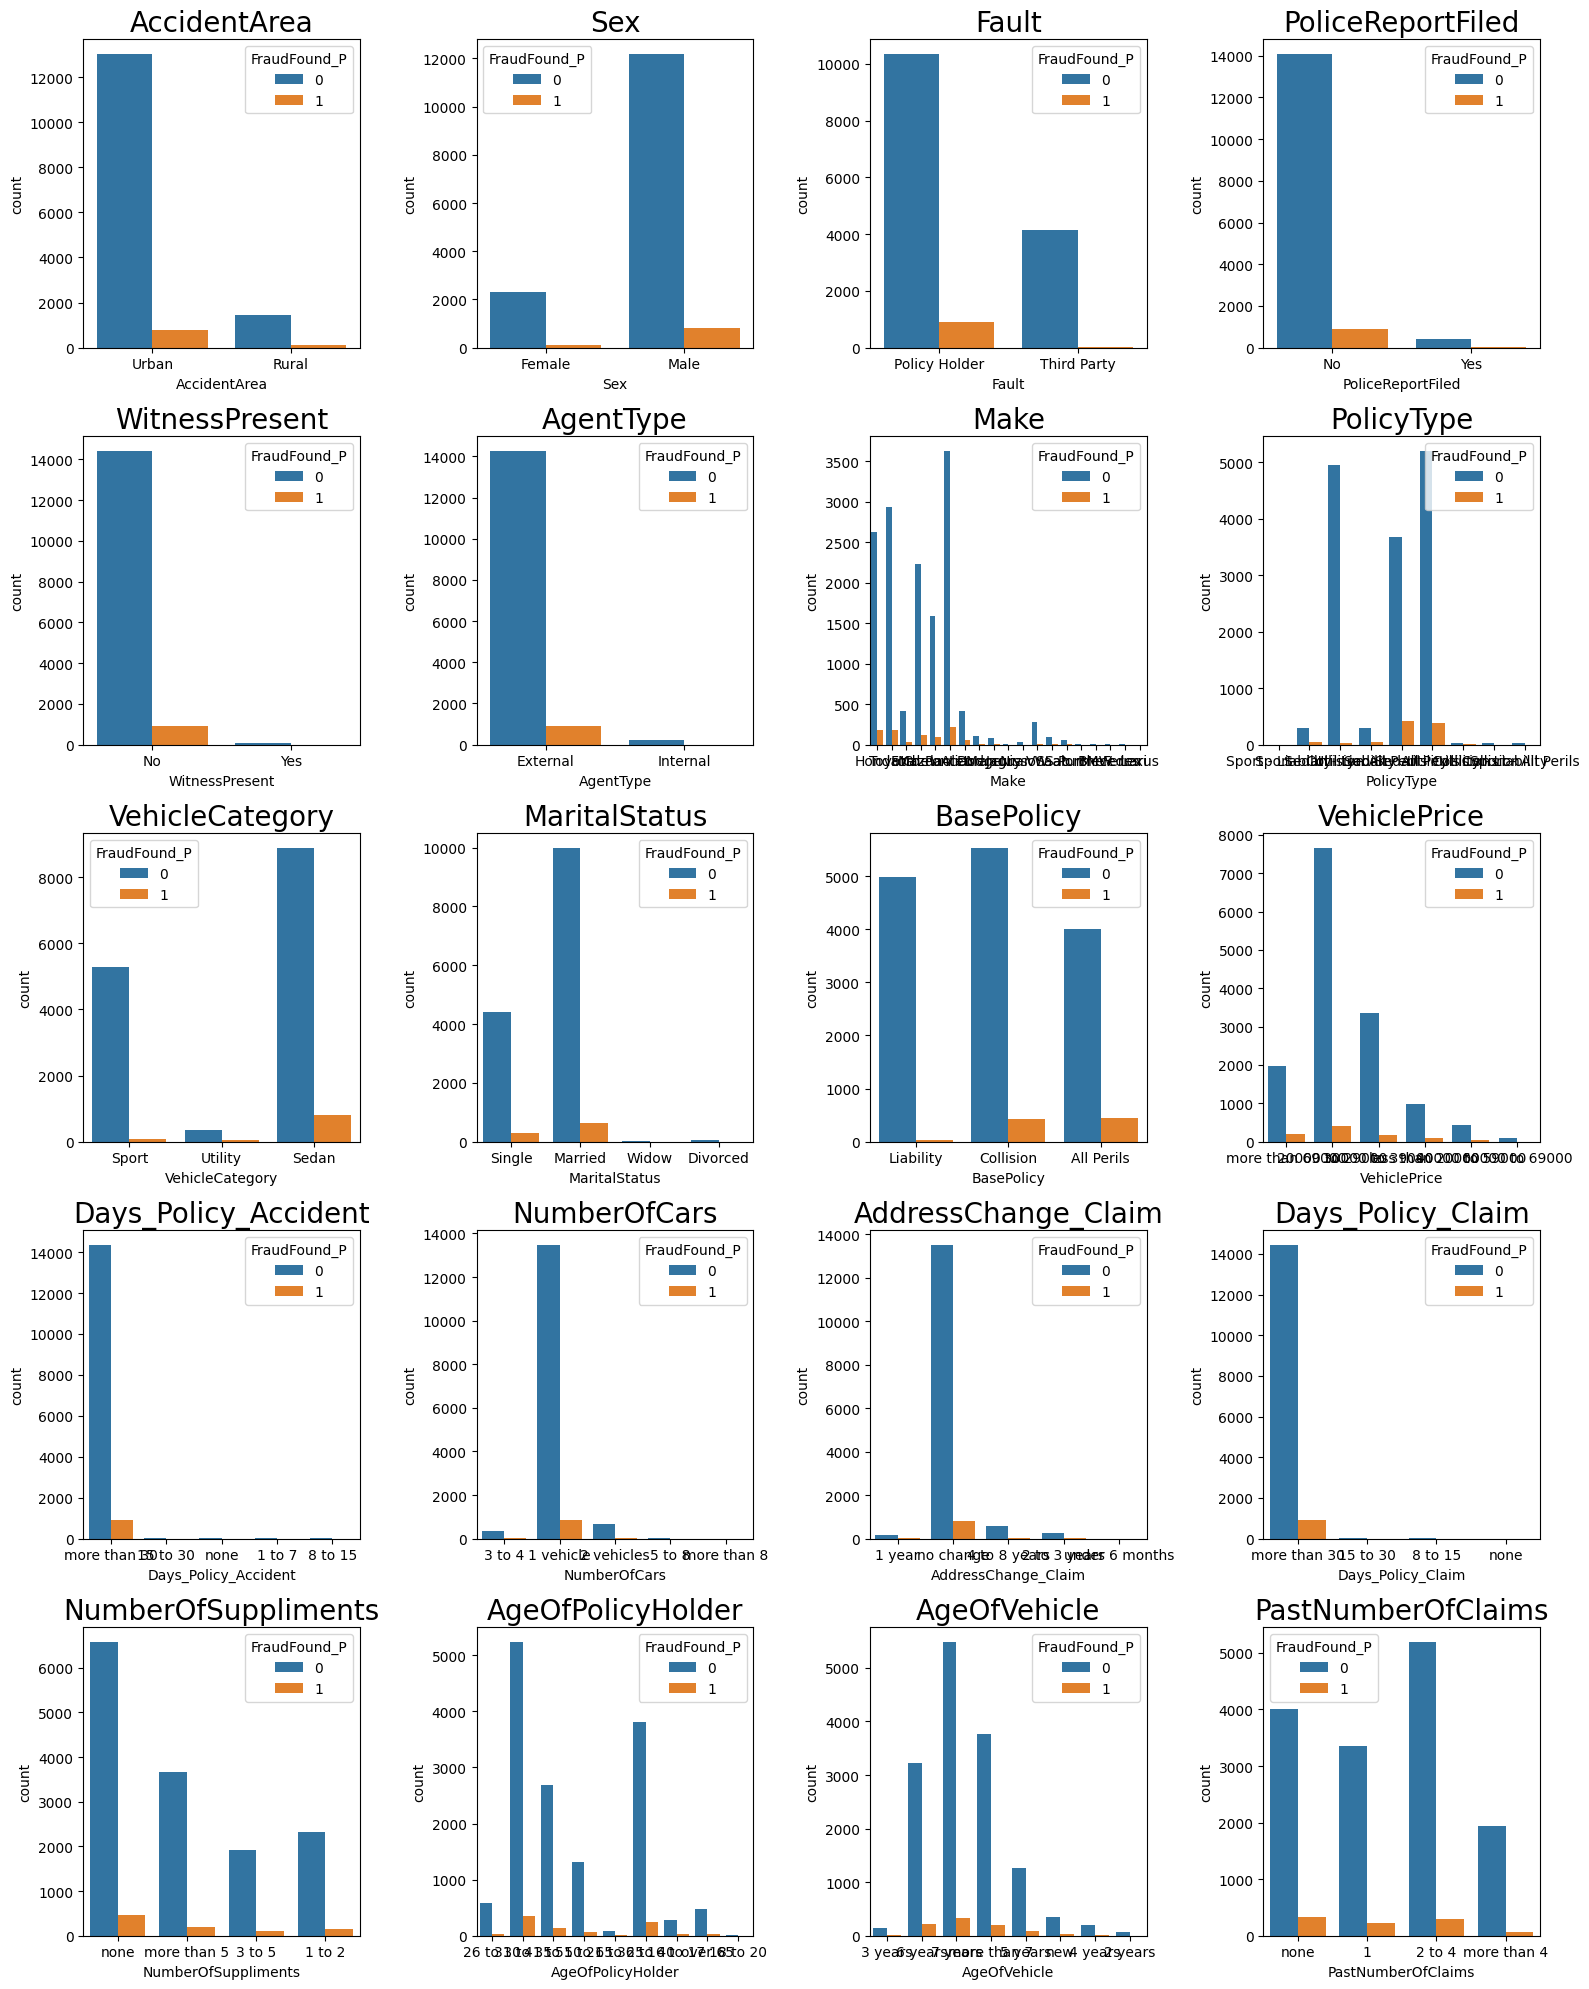

In [ ]:

# Assuming df is your DataFrame and cat_var is your list of categorical variables
# Calculate the number of rows needed for a 4-column layout
n_vars = len(cat_var)
ncols = 4
nrows = math.ceil(n_vars / ncols)  # Ensure enough rows for all subplots

# Set up the matplotlib figure with an appropriate size
f, axes = plt.subplots(nrows, ncols, figsize=(16, nrows * 4), sharex=False)

# Flatten axes array for easier iteration over it
axes = axes.flatten()

# Plot each categorical variable with FraudFound_P as hue for side-by-side comparison
for index, name in enumerate(cat_var):
    sns.countplot(x=name, data=df, hue='FraudFound_P', ax=axes[index])
    axes[index].set_title(name, fontsize=20)
    #axes[index].set_xticklabels(axes[index].get_xticklabels(), rotation=60)

# Remove any empty subplots (if n_vars is not a perfect multiple of ncols)
for i in range(n_vars, len(axes)):
    f.delaxes(axes[i])

# Adjust layout
plt.tight_layout()
plt.show()


We can infer:

1.   Accident Area
*   The majority of accidents occur in urban areas
*   There doesn’t seem to be a significant difference in fraud likelihood between urban and rural areas.

2.   Sex
*   Males are involved in more claims overall, but the proportion of fraudulent claims appears similar between genders
*   There doesn’t seem to be a significant difference in fraud likelihood between male and female claimants

3. Fault
*   The majority of claims are from policyholders (the insured party) at fault
*   Fraudulent claims are more frequently associated with policyholders at fault rather than third parties

4. Police Report Filed
*   Most claims do not have an associated police report
*   Fraudulent claims have a higher proportion when no police report is filed, suggesting that the absence of a police report might be a risk factor for fraud

5. Witness Present
*   Most claims do not have a witness present
*   Similar to police reports, claims without a witness have a higher proportion of fraud, indicating that fraud might be more likely when there is no corroboration

6. Agent Type
*   External agents handle the majority of claims
*   Fraudulent claims are also more prevalent when handled by external agents, suggesting a potential area of scrutiny for fraud detection

7. Make
*   Certain car brands (like Honda and Toyota) appear more frequently, but the distribution of fraudulent claims doesn’t show a clear preference for specific makes

8. Policy Type
*   Liability and Collision policies are the most common
*   Fraudulent claims are slightly more prevalent in Collision policies

9. Vehicle Category:
*   Sedans make up the majority of claims, with a higher proportion of fraudulent claims in this category
*   Utility vehicles and sports cars show fewer claims and do not show a strong fraud trend

10. Marital Status:
*   Single individuals file more claims than married ones
*   Fraudulent claims are proportionally similar across marital statuses, with no clear indication that marital status affects fraud likelihood

11. Base Policy:
*   For non-fraudulent claims, the most common base policy is 'Collision', while the least common is 'All Perils'
*   For fraudulent claims, 'Collision' and 'All Perils' seem to have almost the same count, while 'Liability' is the least common base policy.

12: Vehicle Price:
*   Claims decrease significantly as the vehicle price increases, with the least number of claims for vehicles priced higher (above 50000)
*   Fraudulent claims are present across all vehicle price ranges but are proportionally more frequent in lower-priced vehicles (below 50000)

13. Days Policy Accident
*   Most claims are made more than 30 days since the policy start
*   Fraudulent claims don’t show a clear pattern with respect to days since policy age

14. Number of Cars:
*   The majority of claims are for policies with 1 vehicle
*   Fraudulent claims are also more frequent for policies with 1 vehicle, but their proportion is not significantly higher than nthose for 2 or more vehicles

15. Address Claim Change
*   The majority of claims are from policyholders who have not changed their address recently (categorised as "No change")
*   Fraudulent claims are slightly more proportionate among those who changed their address within 1 year

16. Days Policy Claim
*   The majority of claims are filed for policies that are more than 30 days old
*   Fraudulent claims don’t show a clear pattern with respect to days since policy claim

17. Number of Supplements:
*   Claims with no supplements are the most frequent
*   Fraudulent claims don’t show a clear pattern with respect to number of suppliments

18. Age of Policy Holder
*   Policyholders aged 31 to 50 are the most common
*   There is a slight increase in fraud for younger policyholders, especially those below 35

19. Age of Vehicle:
*   Older vehicles, especially those over 7 years, are common in claims
*   Fraudulent claims are distributed across vehicle ages, with a slight increase for vehicles over 7 years

20. Past Number of Claims:
*   Policyholders with 2 to 4 past claims file the most claims
*   Fraudulent claims are distributed across the different past number of claims,  with a slight increase for those with 0 claims and for those with 2-4 cliams


#### 2.2.2 Analysis of numerical variables

Next, we visualise the KDE of numerical variables by FraudFound_P = 0 and 1.

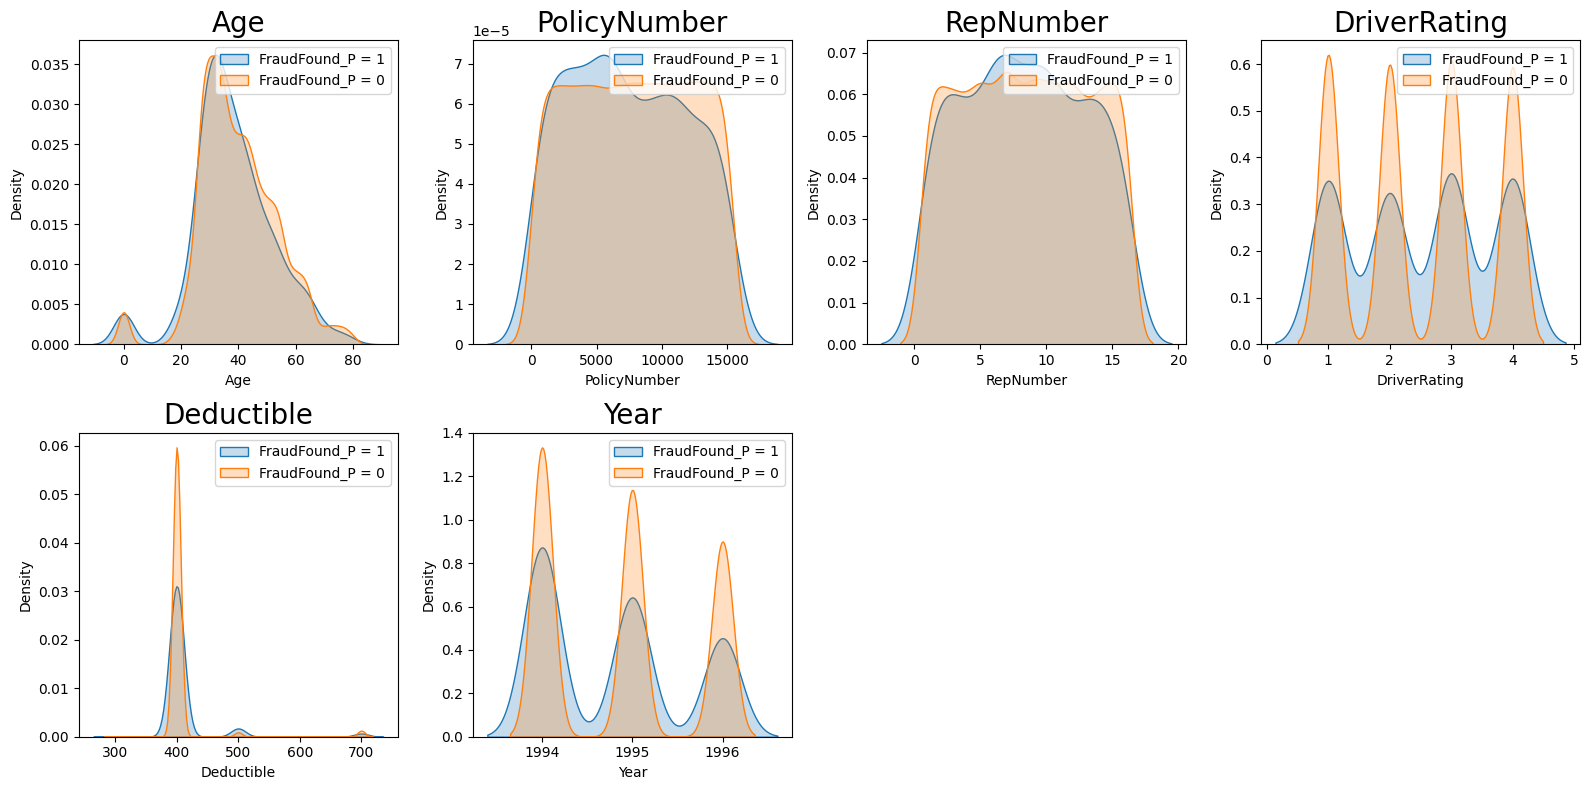

In [ ]:
# Calculate the number of rows required for the layout
n_vars = len(num_var)
ncols = 4  # Number of columns in the grid
nrows = math.ceil(n_vars / ncols)  # Calculate the number of rows

# Set up the matplotlib figure with appropriate size
f, axes = plt.subplots(nrows, ncols, figsize=(16, nrows * 4), sharex=False)

# Flatten the axes array to make it easier to iterate over
axes = axes.flatten()

# Plot each numerical variable using KDE for both FraudFound_P values
for index, name in enumerate(num_var):
    # KDE plot for FraudFound_P = 1
    sns.kdeplot(df[df['FraudFound_P'] == 1][name], fill=True, ax=axes[index], label='FraudFound_P = 1')
    # KDE plot for FraudFound_P = 0
    sns.kdeplot(df[df['FraudFound_P'] == 0][name], fill=True, ax=axes[index], label='FraudFound_P = 0')

    # Set title and add legend
    axes[index].set_title(name, fontsize=20)
    axes[index].legend()

# Remove any extra subplots if there are more axes than variables
for i in range(n_vars, len(axes)):
    f.delaxes(axes[i])

plt.tight_layout()
plt.show()


We can infer:

1. Age
*   The distribution of non-fraudulent claims peaks around the age group of 30 to 50 years, which represents the majority of policyholders filing claims
*   The density of fraudulent claims also peaks in the same age group (30 to 50 years)
*   Hence, age does not seem to have a profound effect on fraudulent claims
*   There is a notable number of policy holders with age 0, which seems to be incorrect. We will handle this incorrect data in section 3.1

2. Policy Number
*   The density of non-fraudulent claims is higher compared to fraudulent claims between policy numbers 0-8000
*   The density of fraudulent claims is noticeably higher between policy numbers 8000-10000
*   Hence, Policy Number can potentially act as a supplementary feature in predicting fraud, especially in conjunction with other variables

3. Rep Number
*   The density of non-fraudulent claims is higher between Rep Number 0-8 compared to fraudulent claims. This indicates that claims handled by representatives with lower numbers are more likely to be legitimate
*   The density of fraudulent claims becomes slightly higher between Rep Number 8-15 in this range, suggesting a higher likelihood of fraud for claims handled by representatives with these numbers
*   This variable might hold some predictive value when combined with other features, especially for identifying higher-risk representatives

4. Driver Rating
*   Fraudulent and non-fraudulent claims show almost identical density patterns for all driver rating levels (1 to 4)
*   The lack of separation between the two distributions suggests that driver rating does not have a strong relationship with fraud

5. Deductible
*   The majority of claims (both fraudulent and non-fraudulent) cluster around a deductible value of 400
*   Fraudulent claims show slightly lower density at deductibles higher than 400, but the difference is minimal
*   Deductible values may have limited predictive power for fraud, as fraudulent claims do not deviate significantly from non-fraudulent ones

6. Year
*   Fraudulent and non-fraudulent claims follow the same annual trends, with peaks in certain years (1994, 1995, 1996)
*   The overlapping distributions suggest that the year itself does not differentiate between fraudulent and non-fraudulent claims
*   The year of the claim might not be a strong indicator of fraud likelihood

#### 2.2.3 Analysis of cyclical variables

Now, we plot a countplot visualisation for the cyclical variables by FraudFound_P = 0 and 1.

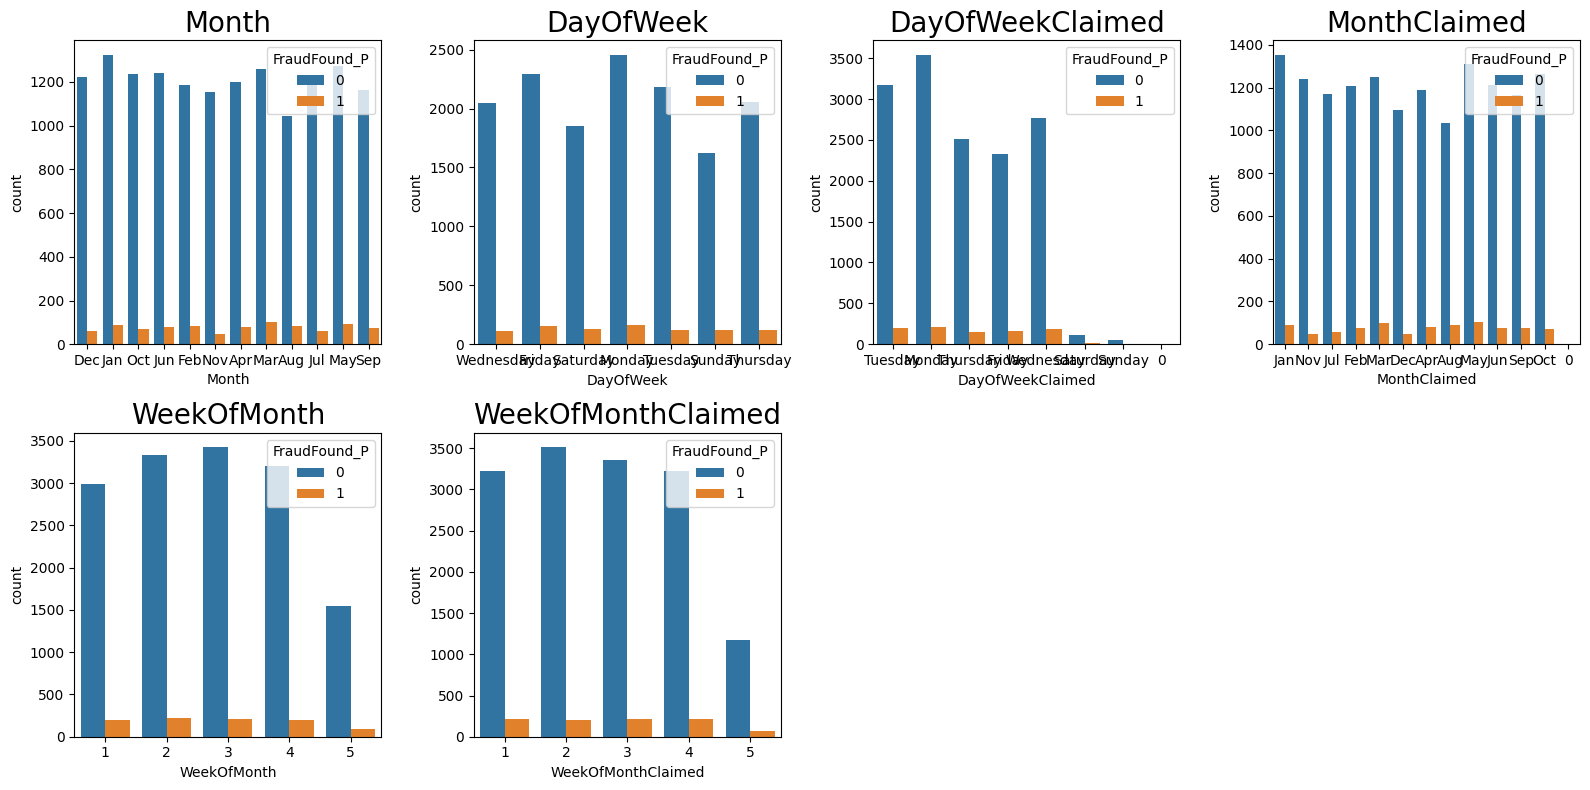

In [ ]:
# Calculate the number of rows required for the layout
n_vars = len(cyclic_var)
ncols = 4
nrows = math.ceil(n_vars / ncols)  # Ensures enough rows for all variables

# Set up the matplotlib figure with appropriate size
f, axes = plt.subplots(nrows, ncols, figsize=(16, nrows * 4), sharex=False)

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Plot each categorical variable with hue for `FraudFound_P`
for index, name in enumerate(cyclic_var):
    sns.countplot(x=name, hue='FraudFound_P', data=df, ax=axes[index])
    axes[index].set_title(name, fontsize=20)
    #axes[index].set_xticklabels(axes[index].get_xticklabels(), rotation=60)

# Remove any empty subplots if num_vars is not a perfect multiple of ncols
for i in range(n_vars, len(axes)):
    f.delaxes(axes[i])

plt.tight_layout()
plt.show()

We note that variables 'DayOfWeekClaimed' and 'MonthClaimed' has '0' as a value, which does not make sense. We will deal with this anomaly later in section 2.

#### 2.2.4 Analysis of target variable

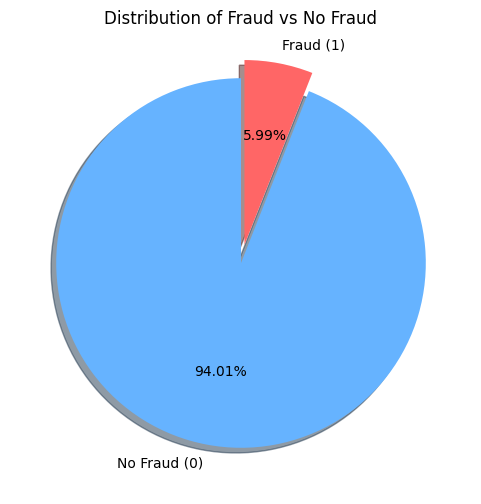

In [ ]:
fraud_counts = df['FraudFound_P'].value_counts()

labels = ['No Fraud (0)', 'Fraud (1)']
colors = ['#66b3ff', '#ff6666']

plt.figure(figsize=(6, 6))
plt.pie(fraud_counts, labels=labels, autopct='%1.2f%%', colors=colors, startangle=90, explode=(0, 0.1), shadow=True)

# Add a title
plt.title('Distribution of Fraud vs No Fraud')

# Show the plot
plt.show()

In [ ]:
n_fraud = len(df[df['FraudFound_P'] == 1])
n_rows = len(df['FraudFound_P'])
fraud_rate = n_fraud/n_rows

print("Proportion of fraud in whole dataset is: " + str(fraud_rate))

Proportion of fraud in whole dataset is: 0.05985732814526589


As we can see, this dataset is severely imbalanced, with the number of non-fraud datapoints being more than 15 times of the number of fraud datapoints. To prevent the data imbalance from heavily skewing our models during training, we will be dealing with this data imbalance in section 6.

## 3. Handling Incorrect Data

In section 2, we identified 2 anomalies that need to be corrected:

1.   Handling data point(s) with 'Age' =- 0
2.   Handling data point(s) with 'MonthClaimed' == '0' and 'DayOfWeekClaimed' == '0'

We will now handle them below.


### 3.1 Handling data point(s) with 'Age' == 0

We'll first isolate datapoints with 'Age' == 0 in a dataframe and figure out how many data points there are with 'Age' == 0.

In [ ]:
# Visualisa row(s) with Age == 0
df_age0 = df[df['Age'] == 0]
df_age0

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
7,Nov,1,Friday,Honda,Urban,Tuesday,Mar,4,Male,Single,...,new,16 to 17,No,No,External,none,no change,1 vehicle,1994,Collision
13,Jan,5,Friday,Honda,Rural,Wednesday,Feb,1,Male,Single,...,new,16 to 17,No,No,External,none,no change,1 vehicle,1994,Collision
28,Jul,1,Saturday,Honda,Urban,Tuesday,Sep,4,Male,Single,...,new,16 to 17,No,No,External,none,no change,1 vehicle,1994,All Perils
31,Mar,1,Sunday,Honda,Urban,Tuesday,Mar,2,Male,Single,...,new,16 to 17,No,No,External,none,no change,1 vehicle,1994,Collision
58,May,1,Monday,Honda,Rural,Wednesday,May,4,Male,Single,...,new,16 to 17,No,No,External,none,no change,1 vehicle,1994,Liability
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15243,May,2,Tuesday,Honda,Urban,Monday,May,3,Male,Single,...,new,16 to 17,No,No,External,none,no change,1 vehicle,1996,Liability
15262,Mar,3,Monday,Honda,Urban,Thursday,Mar,3,Male,Single,...,new,16 to 17,No,No,External,none,no change,1 vehicle,1996,Liability
15274,Apr,3,Monday,Honda,Urban,Tuesday,May,1,Male,Single,...,new,16 to 17,No,No,External,none,no change,1 vehicle,1996,Collision
15379,Jan,2,Tuesday,Honda,Urban,Thursday,Jan,2,Male,Single,...,new,16 to 17,No,No,External,none,1 year,1 vehicle,1996,All Perils


In [ ]:
# find the proportion of age == 0

n_age0 = len(df_age0['Age'])
print("Proportion of age == 0 values is: " + str(n_age0/n_rows))


n_age0_fraud = len(df_age0[df_age0['FraudFound_P'] == 1])
print("Proportion of fraud in age == 0 values is: " + str(n_age0_fraud/n_age0))
print("Proportion of fraud in whole dataset is: " + str(fraud_rate))



Proportion of age == 0 values is: 0.020752269779507133
Proportion of fraud in age == 0 values is: 0.096875
Proportion of fraud in whole dataset is: 0.05985732814526589


There are 320 datapoints with 'Age' == 0. It seems that 'Age' == 0 accounts for around 2% of all values, which is not insignificant. Additionally, the fraud rate when 'Age' == 0 is higher that the fraud rate in the whole dataset. Let us check the distributions of other values when 'Age' == 0 to check whether this is a Missing At Random, Missing Not At Random or Missing Completely At Random issue.

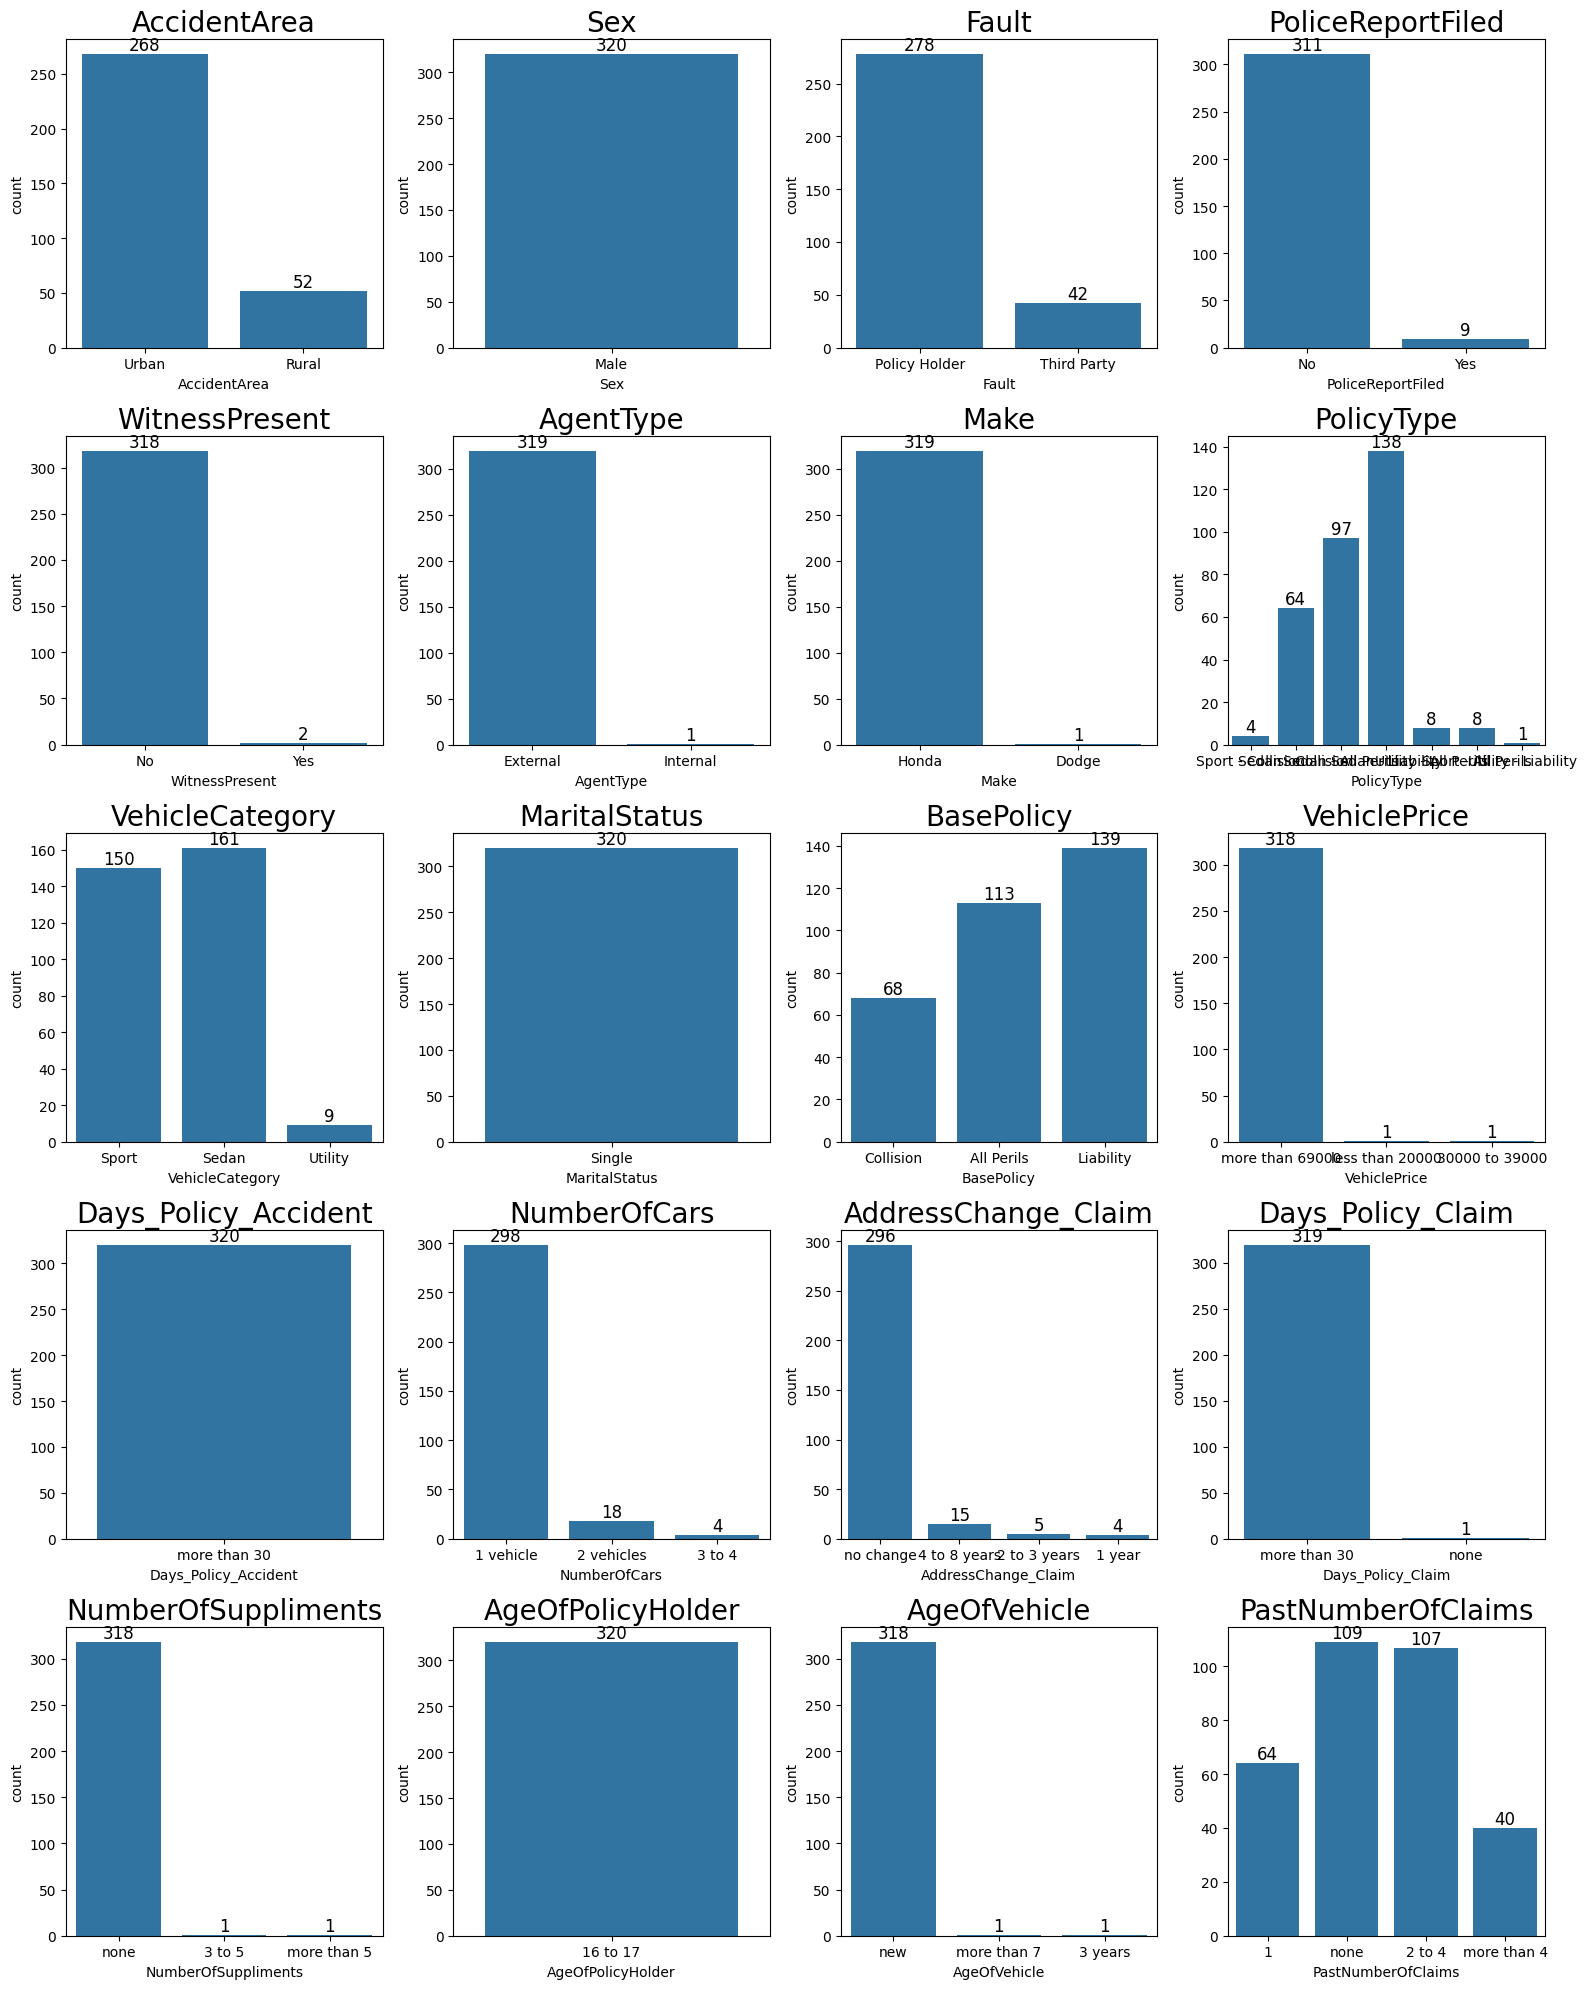

In [ ]:
# Categorical variable countplot

# Assuming df_age0 is your DataFrame and cat_var is your list of categorical variables
n_vars = len(cat_var)
ncols = 4
nrows = math.ceil(n_vars / ncols)  # This ensures we have enough rows

# Set up the matplotlib figure with appropriate size
f, axes = plt.subplots(nrows, ncols, figsize=(16, nrows * 4), sharex=False)

# Flatten axes array for easier iteration
axes = axes.flatten()

# Plot each categorical variable
for index, name in enumerate(cat_var):
    # Create the countplot
    sns.countplot(x=name, data=df_age0, ax=axes[index])
    axes[index].set_title(name, fontsize=20)

    # Add count numbers on top of bars
    for p in axes[index].patches:
        axes[index].annotate(f'{int(p.get_height())}',
                             (p.get_x() + p.get_width() / 2., p.get_height()),
                             ha='center', va='bottom', fontsize=12)

# Remove any empty subplots (if num_vars is not a perfect multiple of ncols)
for i in range(n_vars, len(axes)):
    f.delaxes(axes[i])

plt.tight_layout()
plt.show()


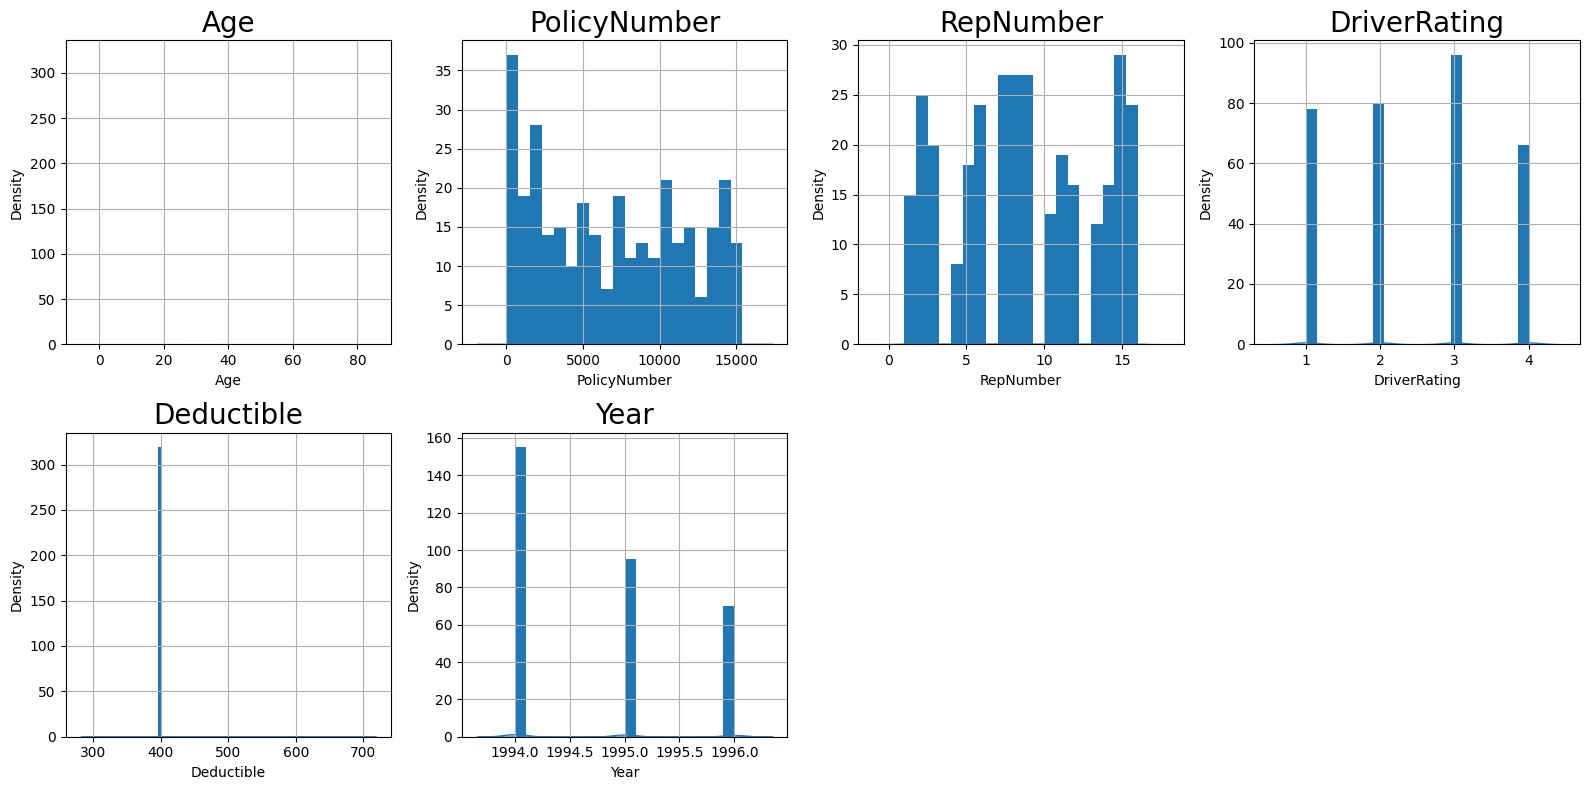

In [ ]:
# For numerical

# Calculate the number of rows required for the layout
n_vars = len(num_var)
ncols = 4  # Number of columns in the grid
nrows = math.ceil(n_vars / ncols)  # Calculate the number of rows

# Set up the matplotlib figure with appropriate size
f, axes = plt.subplots(nrows, ncols, figsize=(16, nrows * 4), sharex=False)

# Flatten the axes array to make it easier to iterate over
axes = axes.flatten()

# Plot each numerical variable using KDE
for index, name in enumerate(num_var):
    sns.kdeplot(df[name], fill=True, ax=axes[index])
    df_age0[name].hist(ax=axes[index], bins=20)
    axes[index].set_title(name, fontsize=20)

# Remove any extra subplots if there are more axes than variables
for i in range(n_vars, len(axes)):
    f.delaxes(axes[i])

plt.tight_layout()
plt.show()



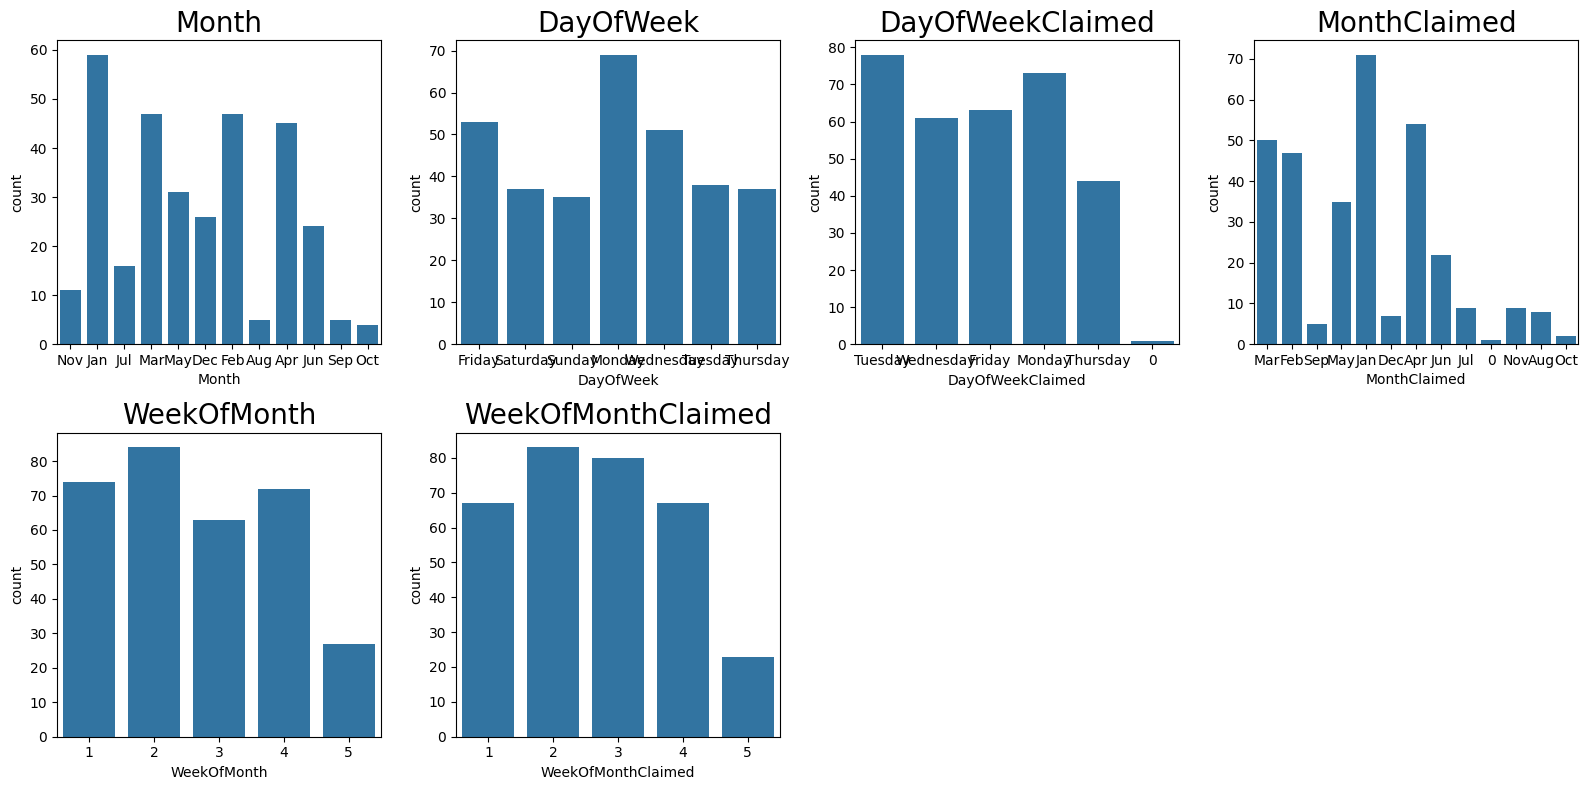

In [ ]:
# Calculate number of rows required for 2 columns layout
n_vars = len(cyclic_var)
ncols = 4
nrows = math.ceil(n_vars / ncols)  # This ensures we have enough rows

# Set up the matplotlib figure with appropriate size
f, axes = plt.subplots(nrows, ncols, figsize=(16, nrows * 4), sharex=False)

# Flatten axes array for easier iteration
axes = axes.flatten()

# Plot each categorical variable
for index, name in enumerate(cyclic_var):
    sns.countplot(x=name, data=df_age0, ax=axes[index])
    axes[index].set_title(name, fontsize=20)
    #axes[index].set_xticklabels(axes[index].get_xticklabels(), rotation=60)

# Remove any empty subplots (if num_vars is not a perfect multiple of ncols)
for i in range(n_vars, len(axes)):
    f.delaxes(axes[i])

plt.tight_layout()
plt.show()


All 'Age' == 0 datapoints have the corresponding values--'Sex' == 'Male', 'MaritalStatus' == Single, 'Days_Policy_Accident' == 'more than 30', 'AgeOfPolicyHolder' == '16 to 17' and 'Deductible' = 400.

Hence, we can conclude that this is likely to be a Missing At Random issue.

We note that the dataset also provides the column 'AgeOfPolicyHolder'--which shows the age of the policy holder in bands. Since 'AgeOfPolicyHolder' == '16 to 17' for all 'Age' == 0, we will use this information to replace 'Age' == 0 values.

We will replace all 'Age' == 0 values with 17.

In [ ]:
# Mask the 0 values in the Age column as missing (NaN)
df['Age'] = df['Age'].replace(0, 17)


In [ ]:
# to verify that all age == 0 is replaced
print(df[df["Age"] == 0])
df[df.isna().any(axis=1)]

Empty DataFrame
Columns: [Month, WeekOfMonth, DayOfWeek, Make, AccidentArea, DayOfWeekClaimed, MonthClaimed, WeekOfMonthClaimed, Sex, MaritalStatus, Age, Fault, PolicyType, VehicleCategory, VehiclePrice, FraudFound_P, PolicyNumber, RepNumber, Deductible, DriverRating, Days_Policy_Accident, Days_Policy_Claim, PastNumberOfClaims, AgeOfVehicle, AgeOfPolicyHolder, PoliceReportFiled, WitnessPresent, AgentType, NumberOfSuppliments, AddressChange_Claim, NumberOfCars, Year, BasePolicy]
Index: []

[0 rows x 33 columns]


,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy


### 3.2 Handling data point(s) with 'MonthClaimed' == '0' and 'DayOfWeekClaimed' == '0'

We'll first visualise the points with 'MonthClaimed' == 0 && 'DayOfWeekClaimed' == 0.

In [ ]:
# Visualise rows with dayofweekclaimed == 0, monthclaimed == 0 and age == 0

df_dowc0 = df[df['DayOfWeekClaimed'] == '0']
df_dowc0.head()


,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
1516,Jul,2,Monday,Honda,Rural,0,0,1,Male,Single,...,new,16 to 17,No,No,External,none,no change,1 vehicle,1994,All Perils


In [ ]:
df_month0 = df[df['MonthClaimed'] == '0']
df_month0.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
1516,Jul,2,Monday,Honda,Rural,0,0,1,Male,Single,...,new,16 to 17,No,No,External,none,no change,1 vehicle,1994,All Perils


We note that there is just 1 datapoint with 'MonthClaimed' == 0 && 'DayOfWeekClaimed' == 0.

Additionally, the datapoint with  'MonthClaimed' == 0 && 'DayOfWeekClaimed' == 0 is the same.

Since it is just 1 datapoint, it is unlikely to offer much extra information when training the models later. Hence, we will remove this row from the dataset.

In [ ]:
df = df[(df.MonthClaimed != '0') | (df.DayOfWeekClaimed != '0')]

#to verify
print(df[(df.MonthClaimed == '0') | (df.DayOfWeekClaimed == '0')])

Empty DataFrame
Columns: [Month, WeekOfMonth, DayOfWeek, Make, AccidentArea, DayOfWeekClaimed, MonthClaimed, WeekOfMonthClaimed, Sex, MaritalStatus, Age, Fault, PolicyType, VehicleCategory, VehiclePrice, FraudFound_P, PolicyNumber, RepNumber, Deductible, DriverRating, Days_Policy_Accident, Days_Policy_Claim, PastNumberOfClaims, AgeOfVehicle, AgeOfPolicyHolder, PoliceReportFiled, WitnessPresent, AgentType, NumberOfSuppliments, AddressChange_Claim, NumberOfCars, Year, BasePolicy]
Index: []

[0 rows x 33 columns]


## 4. Feature Engineering

### 4.1.1 Cyclical Variables - Applying Sine Cosine Transformations

In [ ]:
import numpy as np

# Define mappings for months and days of the week to their corresponding numbers
cyclical_value_mappings = {
    'DayOfWeek': {'Monday': 0, 'Tuesday': 1, 'Wednesday': 2, 'Thursday': 3, 'Friday': 4, 'Saturday': 5, 'Sunday': 6},
    'Month': {'Jan': 0, 'Feb': 1, 'Mar': 2, 'Apr': 3, 'May': 4, 'Jun': 5, 'Jul': 6, 'Aug': 7, 'Sep': 8, 'Oct': 9, 'Nov': 10, 'Dec': 11},
    'DayOfWeekClaimed': {'Monday': 0, 'Tuesday': 1, 'Wednesday': 2, 'Thursday': 3, 'Friday': 4, 'Saturday': 5, 'Sunday': 6},
    'MonthClaimed': {'Jan': 0, 'Feb': 1, 'Mar': 2, 'Apr': 3, 'May': 4, 'Jun': 5, 'Jul': 6, 'Aug': 7, 'Sep': 8, 'Oct': 9, 'Nov': 10, 'Dec': 11}
}

cyclical_max_values = {
    'Month': 12, 'DayOfWeek': 7, 'DayOfWeekClaimed': 7, 'MonthClaimed': 12,
    'WeekOfMonth': 5, 'WeekOfMonthClaimed': 5
}

for var, max_val in cyclical_max_values.items():
    if var in cyclical_value_mappings:  # For categorical variables, map values before applying transformations
        df[var + '_sin'] = np.sin(2 * np.pi * df[var].map(cyclical_value_mappings[var]) / max_val)
        df[var + '_cos'] = np.cos(2 * np.pi * df[var].map(cyclical_value_mappings[var]) / max_val)
    else:  # For integer variables (WeekOfMonth and WeekOfMonthClaimed), apply transformations directly
        df[var + '_sin'] = np.sin(2 * np.pi * df[var] / max_val)
        df[var + '_cos'] = np.cos(2 * np.pi * df[var] / max_val)

# Display the DataFrame to verify the new columns
df.head()


<ipython-input-44-15045b12be9f>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[var + '_sin'] = np.sin(2 * np.pi * df[var].map(cyclical_value_mappings[var]) / max_val)
<ipython-input-44-15045b12be9f>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[var + '_cos'] = np.cos(2 * np.pi * df[var].map(cyclical_value_mappings[var]) / max_val)
<ipython-input-44-15045b12be9f>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,DayOfWeek_sin,DayOfWeek_cos,DayOfWeekClaimed_sin,DayOfWeekClaimed_cos,MonthClaimed_sin,MonthClaimed_cos,WeekOfMonth_sin,WeekOfMonth_cos,WeekOfMonthClaimed_sin,WeekOfMonthClaimed_cos
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,0.974928,-0.222521,0.781831,0.623490,0.000000e+00,1.000000,-2.449294e-16,1.000000,0.951057,0.309017
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,0.974928,-0.222521,0.000000,1.000000,0.000000e+00,1.000000,-5.877853e-01,-0.809017,-0.951057,0.309017
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,-0.433884,-0.900969,0.433884,-0.900969,-8.660254e-01,0.500000,-2.449294e-16,1.000000,0.587785,-0.809017
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,-0.974928,-0.222521,-0.433884,-0.900969,1.224647e-16,-1.000000,5.877853e-01,-0.809017,0.951057,0.309017
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,0.000000,1.000000,0.781831,0.623490,5.000000e-01,0.866025,-2.449294e-16,1.000000,0.587785,-0.809017


Sine and cosine transformations are used to represent each cyclical value as a point on a a unit circle. This representation allows our models to understand that, for instance, 12 (December) and 1 (January) are adjacent, unlike a standard linear representation where the model would perceive them as far apart.


 We encode each of the cyclical variables by creating 2 new columns for their sine and cosine. This transformation ensures that values at the "end" of the cycle are close to values at the "beginning," capturing the cyclical relationship.


### 4.1.2 Cyclical Variables - Create new columns: DayOfWeek_Cyclic_Diff, WeekOfMonth_Cyclic_Diff, Month_Cyclic_Diff

In [ ]:
import numpy as np

# Define a function to calculate the Euclidean distance between two cyclical variables
def euclidean_cyclic_distance(sin1, cos1, sin2, cos2):
    return np.sqrt((sin1 - sin2)**2 + (cos1 - cos2)**2)

# Calculate 'DayOfWeek' vs 'DayOfWeekClaimed' Cyclical Distance
df['DayOfWeek_Cyclic_Diff'] = df.apply(
    lambda row: euclidean_cyclic_distance(
        row['DayOfWeek_sin'], row['DayOfWeek_cos'],
        row['DayOfWeekClaimed_sin'], row['DayOfWeekClaimed_cos']
    ),
    axis=1
)

# Calculate 'WeekOfMonth' vs 'WeekOfMonthClaimed' Cyclical Distance
df['WeekOfMonth_Cyclic_Diff'] = df.apply(
    lambda row: euclidean_cyclic_distance(
        row['WeekOfMonth_sin'], row['WeekOfMonth_cos'],
        row['WeekOfMonthClaimed_sin'], row['WeekOfMonthClaimed_cos']
    ),
    axis=1
)

# Calculate 'Month' vs 'MonthClaimed' Cyclical Distance
df['Month_Cyclic_Diff'] = df.apply(
    lambda row: euclidean_cyclic_distance(
        row['Month_sin'], row['Month_cos'],
        row['MonthClaimed_sin'], row['MonthClaimed_cos']
    ),
    axis=1
)

After feature engineering to create the 3 new cyclic difference columns, we drop the sin and cos columns from Step 4.1.1 as cyclical distance captures the information between them. However, we still retain original cyclical features (e.g. WeekOfMonth, DayOfWeek) from the initial dataset because they may contain useful non-cyclical patterns (e.g., fraud might occur more on weekends, irrespective of the difference between two days).


In [ ]:
from scipy.stats import chi2_contingency

def perform_chi_square_test(feature_name):
    contingency = pd.crosstab(df[feature_name], df['FraudFound_P'])
    chi2, p, dof, expected = chi2_contingency(contingency)
    return p

# Perform Chi-Square tests for all three cyclical distance features
day_of_week_p = perform_chi_square_test('DayOfWeek_Cyclic_Diff')
week_of_month_p = perform_chi_square_test('WeekOfMonth_Cyclic_Diff')
month_p = perform_chi_square_test('Month_Cyclic_Diff')

print(f"{'Feature':<30} {'Chi-Square p-value'}")
print("-" * 45)
print(f"{'DayOfWeek_Cyclic_Diff':<30} {day_of_week_p:.5f}")
print(f"{'WeekOfMonth_Cyclic_Diff':<30} {week_of_month_p:.5f}")
print(f"{'Month_Cyclic_Diff':<30} {month_p:.5f}")


Feature                        Chi-Square p-value
---------------------------------------------
DayOfWeek_Cyclic_Diff          0.00001
WeekOfMonth_Cyclic_Diff        0.00000
Month_Cyclic_Diff              0.00615


Across all 3 Chi-Square tests, the p-value below 0.05 implies that there is a statistically significant association between each of the 3 new features and FraudFound_P at a 95% confidence level. In other words, these features add meaningful information that can help differentiate between fraud and non-fraud cases

The new features capture the cyclic distance between actual and claimed time-based variables. This is important because it highlights discrepancies or mismatches in cyclic patterns, which could be indicative of anomalies or patterns in the target variable.
For example, if Month_Cyclic_Diff is high, it indicates a significant difference between Month and MonthClaimed, which could signal an unusual or suspicious pattern in cases where the timing of events is important.

### 4.2 Create new 'Policy_Accident_Claim_Diff' column



In [ ]:
# Mapping ranges to numerical values without modifying the original columns
category_to_value = {
    'none': 0,
    '1 to 7': 1,
    '8 to 15': 2,
    '15 to 30': 3,
    'more than 30': 4
}

# Create temporary mapped columns for the calculation
df['Days_Policy_Claim_temp'] = df['Days_Policy_Claim'].map(category_to_value)
df['Days_Policy_Accident_temp'] = df['Days_Policy_Accident'].map(category_to_value)

# Compute the absolute difference using the temporary columns
df['Policy_Accident_Claim_Diff'] = (df['Days_Policy_Claim_temp'] - df['Days_Policy_Accident_temp']).abs()

# Drop the temporary columns after the calculation
df.drop(columns=['Days_Policy_Claim_temp', 'Days_Policy_Accident_temp'], inplace=True)

We create a new feature, 'Policy_Accident_Claim_Diff' which represents the absolute difference between two key dates: Days_Policy_Claim and Days_Policy_Accident i.e. the timing gap between the policy issue date and the date of an accident, as claimed by the policyholder.

This can reveal patterns or anomalies. For example: A short gap between policy issuance and accident claim could hint at opportunistic claims, potentially indicating higher risk or fraud.

We kept the original Days_Policy_Claim and Days_Policy_Accident intact, using temporary columns to aid in calculation for this new feature. This is to avoid data leakage (encoding will only be applied after the train-test split)

In [ ]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency = pd.crosstab(df['Policy_Accident_Claim_Diff'], df['FraudFound_P'])

# Perform Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency)
print(f"Chi-Square Test p-value: {p:.4f}")


Chi-Square Test p-value: 0.0121


From the Chi-Square test, the p-value below 0.05 implies that there is a statistically significant association between this new feature and FraudFound_P at a 95% confidence level. In other words, it can add meaningful information that can help differentiate between fraud and non-fraud cases.

## Encoding

In [ ]:
import pandas as pd

binary_columns = ['AccidentArea', 'Sex', 'Fault', 'PoliceReportFiled', 'WitnessPresent', 'AgentType']

# Define the mapping for binary categories
binary_mappings = {
    'AccidentArea': {'Urban': 1, 'Rural': 0},
    'Sex': {'Male': 1, 'Female': 0},
    'Fault': {'Policy Holder': 1, 'Third Party': 0},
    'PoliceReportFiled': {'Yes': 1, 'No': 0},
    'WitnessPresent': {'Yes': 1, 'No': 0},
    'AgentType': {'External': 1, 'Internal': 0}
}

# Apply the mapping to convert the categorical variables into binary (1 or 0)
for column, mapping in binary_mappings.items():
    df[column] = df[column].map(mapping)

# Check the changes
df.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,MonthClaimed_sin,MonthClaimed_cos,WeekOfMonth_sin,WeekOfMonth_cos,WeekOfMonthClaimed_sin,WeekOfMonthClaimed_cos,DayOfWeek_Cyclic_Diff,WeekOfMonth_Cyclic_Diff,Month_Cyclic_Diff,Policy_Accident_Claim_Diff
0,Dec,5,Wednesday,Honda,1,Tuesday,Jan,1,0,Single,...,0.000000e+00,1.000000,-2.449294e-16,1.000000,0.951057,0.309017,0.867767,1.175571,0.517638,0
1,Jan,3,Wednesday,Honda,1,Monday,Jan,4,1,Single,...,0.000000e+00,1.000000,-5.877853e-01,-0.809017,-0.951057,0.309017,1.563663,1.175571,0.000000,0
2,Oct,5,Friday,Honda,1,Thursday,Nov,2,1,Married,...,-8.660254e-01,0.500000,-2.449294e-16,1.000000,0.587785,-0.809017,0.867767,1.902113,0.517638,0
3,Jun,2,Saturday,Toyota,0,Friday,Jul,1,1,Married,...,1.224647e-16,-1.000000,5.877853e-01,-0.809017,0.951057,0.309017,0.867767,1.175571,0.517638,0
4,Jan,5,Monday,Honda,1,Tuesday,Feb,2,0,Single,...,5.000000e-01,0.866025,-2.449294e-16,1.000000,0.587785,-0.809017,0.867767,1.902113,0.517638,0


In [ ]:
# Define the mappings
ordinal_mappings = {
    'VehiclePrice': {'less than 20000': 0, '20000 to 29000': 1, '30000 to 39000': 2, '40000 to 59000': 3, '60000 to 69000': 4, 'more than 69000': 5},
    'Days_Policy_Accident': {'none': 0, '1 to 7': 1, '8 to 15': 2, '15 to 30': 3, 'more than 30': 4},
    'Days_Policy_Claim': {'none': 0, '8 to 15': 1, '15 to 30': 2, 'more than 30': 3},
    'NumberOfSuppliments': {'none':0, '1 to 2': 1, '3 to 5': 2, 'more than 5': 3},
    'AddressChange_Claim': {'no change': 0, 'under 6 months': 1, '1 year': 2, '2 to 3 years': 3, '4 to 8 years': 4},
    'NumberOfCars': {'1 vehicle': 0, '2 vehicles': 1, '3 to 4': 2, '5 to 8': 3, 'more than 8': 4},
    'AgeOfPolicyHolder': {'16 to 17': 0, '18 to 20': 1, '21 to 25': 2, '26 to 30': 3, '31 to 35': 4, '36 to 40': 5, '41 to 50': 6, '51 to 65': 7, 'over 65': 8},
    'AgeOfVehicle': {'new': 0, '2 years': 1, '3 years': 2, '4 years': 3, '5 years': 4, '6 years': 5, '7 years': 6, 'more than 7': 7},
    'PastNumberOfClaims': {'none': 0, '1': 1, '2 to 4': 2, 'more than 4': 3}
}

# Apply the mappings
for column, mapping in ordinal_mappings.items():
    df[column] = df[column].map(mapping)

# Check the changes
df.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,MonthClaimed_sin,MonthClaimed_cos,WeekOfMonth_sin,WeekOfMonth_cos,WeekOfMonthClaimed_sin,WeekOfMonthClaimed_cos,DayOfWeek_Cyclic_Diff,WeekOfMonth_Cyclic_Diff,Month_Cyclic_Diff,Policy_Accident_Claim_Diff
0,Dec,5,Wednesday,Honda,1,Tuesday,Jan,1,0,Single,...,0.000000e+00,1.000000,-2.449294e-16,1.000000,0.951057,0.309017,0.867767,1.175571,0.517638,0
1,Jan,3,Wednesday,Honda,1,Monday,Jan,4,1,Single,...,0.000000e+00,1.000000,-5.877853e-01,-0.809017,-0.951057,0.309017,1.563663,1.175571,0.000000,0
2,Oct,5,Friday,Honda,1,Thursday,Nov,2,1,Married,...,-8.660254e-01,0.500000,-2.449294e-16,1.000000,0.587785,-0.809017,0.867767,1.902113,0.517638,0
3,Jun,2,Saturday,Toyota,0,Friday,Jul,1,1,Married,...,1.224647e-16,-1.000000,5.877853e-01,-0.809017,0.951057,0.309017,0.867767,1.175571,0.517638,0
4,Jan,5,Monday,Honda,1,Tuesday,Feb,2,0,Single,...,5.000000e-01,0.866025,-2.449294e-16,1.000000,0.587785,-0.809017,0.867767,1.902113,0.517638,0


In [ ]:
# Identify nominal columns to one-hot encode
nominal_cols = ['Make', 'PolicyType', 'VehicleCategory', 'MaritalStatus', 'BasePolicy']  # Add other nominal columns as needed

# Apply one-hot encoding to these columns
df = pd.get_dummies(df, columns=nominal_cols, drop_first=True)

# The df_encoded now contains one-hot encoded columns and can be used for further processing or model training
df.head()

,Month,WeekOfMonth,DayOfWeek,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,Age,Fault,...,PolicyType_Utility - All Perils,PolicyType_Utility - Collision,PolicyType_Utility - Liability,VehicleCategory_Sport,VehicleCategory_Utility,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Widow,BasePolicy_Collision,BasePolicy_Liability
0,Dec,5,Wednesday,1,Tuesday,Jan,1,0,21,1,...,False,False,False,True,False,False,True,False,False,True
1,Jan,3,Wednesday,1,Monday,Jan,4,1,34,1,...,False,False,False,True,False,False,True,False,True,False
2,Oct,5,Friday,1,Thursday,Nov,2,1,47,1,...,False,False,False,True,False,True,False,False,True,False
3,Jun,2,Saturday,0,Friday,Jul,1,1,65,0,...,False,False,False,True,False,True,False,False,False,True
4,Jan,5,Monday,1,Tuesday,Feb,2,0,27,0,...,False,False,False,True,False,False,True,False,True,False


In [ ]:
cyclical_order = {
    'Month': ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
    'DayOfWeek': ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
    'DayOfWeekClaimed': ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
    'MonthClaimed': ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
}

variables = ['Month', 'DayOfWeek', 'DayOfWeekClaimed', 'MonthClaimed']

In [ ]:
for var in variables:
    df[var] = df[var].apply(lambda x: cyclical_order[var].index(x))

dict_max_val = {'Month': 12, 'DayOfWeek': 7, 'DayOfWeekClaimed': 7, 'MonthClaimed': 12}
                #'WeekOfMonth': 5, 'WeekOfMonthClaimed': 5}

# Encoding function
def encode(data, col, max_val):
    data[col + '_sin'] = np.sin(2 * np.pi * data[col] / max_val)
    data[col + '_cos'] = np.cos(2 * np.pi * data[col] / max_val)
    return data

# Apply encoding to each variable with cyclical max values
for var, max_val in dict_max_val.items():
    df = encode(df, var, max_val)

df.head()

,Month,WeekOfMonth,DayOfWeek,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,Age,Fault,...,PolicyType_Utility - All Perils,PolicyType_Utility - Collision,PolicyType_Utility - Liability,VehicleCategory_Sport,VehicleCategory_Utility,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Widow,BasePolicy_Collision,BasePolicy_Liability
0,11,5,2,1,1,0,1,0,21,1,...,False,False,False,True,False,False,True,False,False,True
1,0,3,2,1,0,0,4,1,34,1,...,False,False,False,True,False,False,True,False,True,False
2,9,5,4,1,3,10,2,1,47,1,...,False,False,False,True,False,True,False,False,True,False
3,5,2,5,0,4,6,1,1,65,0,...,False,False,False,True,False,True,False,False,False,True
4,0,5,0,1,1,1,2,0,27,0,...,False,False,False,True,False,False,True,False,True,False


## 5. Train-test split

We will split our dataset into training, validation and test set.

In [ ]:
# Spilt data into labels and features
X = df.drop(['FraudFound_P'], axis=1)
y = df['FraudFound_P']

# Training and Testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training and Validation set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

## Scaling

We will conduct scaling as features have different scales (e.g., age vs. vehicle price) and may affect models training and evaluation.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Convert the scaled array back to a DataFrame
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_val_scaled = pd.DataFrame(X_val_scaled, columns=X_val.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

## 8. Variance Threshold and RFECV for feature selection

### 8.1 Variance Threshold

Variance Thresholding is a simple yet effective technique for feature selection that removes features with low variance. Features with low variance are typically constant or nearly constant throughout the dataset, providing little information for predictive modeling tasks. By eliminating these low-variance features, we can reduce noise in the data and improve model performance.

In [ ]:
# VarianceThreshold
from sklearn.feature_selection import VarianceThreshold

# VarianceThreshold
selector = VarianceThreshold(threshold=0.1)
X_reduced = selector.fit_transform(X_train_scaled)

selected_feature_indices = selector.get_support(indices=True)
selected_feature_names = X_train_scaled.columns[selected_feature_indices]
X_reduced = pd.DataFrame(X_reduced, columns=selected_feature_names)

### 8.2 RFECV

RFECV is a powerful dimensionality reduction technique that removes unimportant features that might compromise the accuracy of our model. By simplifying the model, RFECV mitigates the risk of overfitting, resulting in more robust predictions

LightGBM is used as it excels in scenarios where datasets have a large number of features or instances, offering faster training speeds and higher accuracy compared to traditional gradient boosting algorithms

In [ ]:
# RFECV
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
import lightgbm as lgb

# LigthGBM
lightgbm_model = lgb.LGBMClassifier(n_estimators=100, learning_rate=0.01, random_state=42, verbose=-1)

rfecv = RFECV(estimator=lightgbm_model, step=1, cv=StratifiedKFold(3), scoring='roc_auc', n_jobs=-1)
rfecv.fit(X_reduced, y_train)
X_selected = rfecv.transform(X_reduced)

selected_feature_indices = np.where(rfecv.support_)[0]
selected_feature_names = X_reduced.columns[selected_feature_indices]
X_rfecv = pd.DataFrame(X_selected, columns=selected_feature_names)

In [ ]:
X_val_rfecv = X_val_scaled[selected_feature_names]

In [ ]:
X_test_rfecv = X_test_scaled[selected_feature_names]

View selected features

In [ ]:
selected_feature_names

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'MonthClaimed', 'Age', 'Fault',
       'PolicyNumber', 'RepNumber', 'Deductible', 'DriverRating',
       'AgeOfVehicle', 'NumberOfSuppliments', 'AddressChange_Claim',
       'NumberOfCars', 'Month_sin', 'Month_cos', 'DayOfWeekClaimed_sin',
       'MonthClaimed_cos', 'DayOfWeek_Cyclic_Diff', 'WeekOfMonth_Cyclic_Diff',
       'Month_Cyclic_Diff', 'PolicyType_Sedan - Collision',
       'BasePolicy_Liability'],
      dtype='object')

## SMOTE on training data to deal with imbalanced classes

In [ ]:
sm = SMOTE(random_state=42, k_neighbors=5)
X_train_sm, y_train_sm = sm.fit_resample(X_rfecv, y_train)

## Functions for model training

The threshold parameter in the find_best_threshold function is used to determine how predicted probabilities are converted into binary class labels. By default, most classifiers use a threshold of 0.5 to convert probabilities into binary labels. However, we would like to adjust the threshold to balance between precision and recall, especially when false negatives are much more costly in our case. Additionally, we have an imbalanced datasets where one class is much more important than the other and adjusting the threshold can help maximize the model's effectiveness for the target metric (roc_auc). We will be using roc_auc as a scoring parameter because, in fraud detection, it is crucial to consider both accuracy and recall.

In [ ]:
from sklearn.metrics import roc_auc_score

def find_best_threshold(model, X_test, y_test, thresholds):
    y_prob = model.predict_proba(X_test)[:, 1]
    best_threshold = 0
    best_score = 0
    for threshold in thresholds:
        y_pred = (y_prob >= threshold).astype(int)
        score = roc_auc_score(y_test, y_pred)
        if score > best_score:
            best_score = score
            best_threshold = threshold
    return best_threshold, best_score

## 9. Model training and evaluation

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn import svm
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from imblearn.ensemble import BalancedRandomForestClassifier
!pip install scikit-optimize
from skopt import BayesSearchCV

### 9.1 Logistic Regression

#### 9.1.1 Base model

In [ ]:
# Initialize and fit the model
model =  LogisticRegression(random_state=42, max_iter=200)
model.fit(X_train_sm, y_train_sm)

# Make predictions on the scaled test data
y_pred = model.predict(X_test_rfecv)

# Results
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'ROC AUC: {roc_auc_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))

Accuracy: 0.6614785992217899
ROC AUC: 0.7488865471203504
              precision    recall  f1-score   support

           0       0.98      0.65      0.78      2885
           1       0.14      0.85      0.24       199

    accuracy                           0.66      3084
   macro avg       0.56      0.75      0.51      3084
weighted avg       0.93      0.66      0.75      3084



#### 9.1.2 Fine-tuned model

In [ ]:
from skopt.space import Real, Categorical

# Define the model
lr = LogisticRegression(random_state=42)

# Define the parameter space
param_space = [
    {
        "solver": Categorical(['liblinear']),
        "penalty": Categorical(['l1', 'l2']),
        "fit_intercept": Categorical([True, False]),
    },
    {
        "solver": Categorical(['lbfgs', 'newton-cg', 'sag']),
        "penalty": Categorical(['l2', None]),
        "fit_intercept": Categorical([True, False]),
    },
    {
        "solver": Categorical(['saga']),
        "penalty": Categorical(['l1', 'l2', None]),
        "fit_intercept": Categorical([True, False]),
    },
    {
        "solver": Categorical(['saga']),
        "penalty": Categorical(['elasticnet']),
        "fit_intercept": Categorical([True, False]),
        "l1_ratio": Real(0, 1, prior='uniform'),
    },
]

# BayesSearchCV
bayes_search = BayesSearchCV(
    estimator=lr,
    search_spaces=param_space,
    scoring='roc_auc',
    n_iter=50,
    cv=3,
    n_jobs=-1,
    random_state=42,
    verbose=2
)

# Fit the model
bayes_search.fit(X_train_sm, y_train_sm)

# Best parameters and model
print(f"Best Parameters: {bayes_search.best_params_}")
best_lr = bayes_search.best_estimator_

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [False, 'l1', 'liblinear'] before, using random point [False, 'l2', 'liblinear']
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [False, 'l2', 'liblinear'] before, using random point [False, 'l2', 'liblinear']
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [False, 'l2', 'liblinear'] before, using random point [True, 'l2', 'liblinear']
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [False, 'l2', 'liblinear'] before, using random point [True, 'l1', 'liblinear']
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [True, 'l1', 'liblinear'] before, using random point [True, 'l1', 'liblinear']
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [False, 'l2', 'liblinear'] before, using random point [False, 'l1', 'liblinear']
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [False, 'l1', 'liblinear'] before, using random point [True, 'l1', 'liblinear']
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [True, 'l2', 'liblinear'] before, using random point [True, 'l1', 'liblinear']
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [True, 'l2', 'liblinear'] before, using random point [True, 'l2', 'liblinear']
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [False, 'l2', 'liblinear'] before, using random point [True, 'l1', 'liblinear']
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [False, 'l2', 'liblinear'] before, using random point [True, 'l2', 'liblinear']
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [False, 'l1', 'liblinear'] before, using random point [False, 'l1', 'liblinear']
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [False, 'l1', 'liblinear'] before, using random point [True, 'l1', 'liblinear']
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [False, 'l2', 'liblinear'] before, using random point [True, 'l1', 'liblinear']
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [True, 'l2', 'liblinear'] before, using random point [False, 'l1', 'liblinear']
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [False, 'l1', 'liblinear'] before, using random point [True, 'l1', 'liblinear']
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [False, 'l2', 'liblinear'] before, using random point [False, 'l1', 'liblinear']
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [True, 'l1', 'liblinear'] before, using random point [True, 'l2', 'liblinear']
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [False, 'l2', 'liblinear'] before, using random point [False, 'l1', 'liblinear']
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [False, 'l2', 'liblinear'] before, using random point [False, 'l1', 'liblinear']
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [False, 'l2', 'liblinear'] before, using random point [True, 'l2', 'liblinear']
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [True, 'l2', 'liblinear'] before, using random point [False, 'l1', 'liblinear']
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [False, 'l2', 'liblinear'] before, using random point [False, 'l1', 'liblinear']
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [False, 'l2', 'liblinear'] before, using random point [True, 'l2', 'liblinear']
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [True, 'l2', 'liblinear'] before, using random point [True, 'l1', 'liblinear']
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [False, 'l1', 'liblinear'] before, using random point [True, 'l1', 'liblinear']
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [False, 'l2', 'liblinear'] before, using random point [False, 'l1', 'liblinear']
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [True, 'l1', 'liblinear'] before, using random point [True, 'l2', 'liblinear']
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [False, 'l2', 'liblinear'] before, using random point [False, 'l1', 'liblinear']
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [False, 'l2', 'liblinear'] before, using random point [False, 'l2', 'liblinear']
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [False, 'l2', 'liblinear'] before, using random point [True, 'l1', 'liblinear']
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [False, 'l2', 'liblinear'] before, using random point [True, 'l2', 'liblinear']
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [True, 'l2', 'liblinear'] before, using random point [True, 'l1', 'liblinear']
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [False, 'l2', 'liblinear'] before, using random point [True, 'l1', 'liblinear']
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [False, 'l2', 'liblinear'] before, using random point [True, 'l1', 'liblinear']
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [True, 'l2', 'liblinear'] before, using random point [True, 'l2', 'liblinear']
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [True, 'l2', 'liblinear'] before, using random point [False, 'l2', 'liblinear']
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [True, 'l1', 'liblinear'] before, using random point [False, 'l2', 'liblinear']
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [False, 'l1', 'liblinear'] before, using random point [True, 'l2', 'liblinear']
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [False, None, 'sag'] before, using random point [False, None, 'sag']
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [True, None, 'sag'] before, using random point [False, 'l2', 'sag']
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [True, None, 'sag'] before, using random point [False, None, 'sag']
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [False, None, 'newton-cg'] before, using random point [True, None, 'newton-cg']
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [True, 'l2', 'newton-cg'] before, using random point [False, 'l2', 'newton-cg']
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [False, 'l2', 'sag'] before, using random point [True, 'l2', 'lbfgs']
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [True, None, 'newton-cg'] before, using random point [True, None, 'newton-cg']
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [True, 'l2', 'sag'] before, using random point [True, None, 'sag']
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [True, 'l2', 'sag'] before, using random point [False, 'l2', 'newton-cg']
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [True, None, 'sag'] before, using random point [True, 'l2', 'lbfgs']
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [False, None, 'newton-cg'] before, using random point [False, None, 'lbfgs']
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [True, 'l2', 'sag'] before, using random point [True, 'l2', 'lbfgs']
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [True, None, 'sag'] before, using random point [True, 'l2', 'sag']
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [False, None, 'sag'] before, using random point [False, 'l2', 'sag']
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [False, None, 'newton-cg'] before, using random point [False, 'l2', 'sag']
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [False, 'l2', 'lbfgs'] before, using random point [False, None, 'sag']
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [False, None, 'sag'] before, using random point [False, 'l2', 'lbfgs']
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [False, 'l2', 'newton-cg'] before, using random point [False, 'l2', 'sag']
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [True, None, 'sag'] before, using random point [True, None, 'lbfgs']
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [True, 'l2', 'lbfgs'] before, using random point [True, 'l2', 'newton-cg']
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [True, 'l2', 'sag'] before, using random point [False, None, 'newton-cg']
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [True, None, 'sag'] before, using random point [False, 'l2', 'sag']
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [True, None, 'lbfgs'] before, using random point [False, 'l2', 'newton-cg']
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [True, 'l2', 'newton-cg'] before, using random point [False, None, 'lbfgs']
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [True, 'l2', 'newton-cg'] before, using random point [False, 'l2', 'sag']
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [True, 'l2', 'lbfgs'] before, using random point [True, None, 'newton-cg']
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [True, None, 'sag'] before, using random point [False, None, 'lbfgs']
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [False, None, 'newton-cg'] before, using random point [False, 'l2', 'sag']
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [False, None, 'newton-cg'] before, using random point [True, None, 'newton-cg']
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [False, None, 'newton-cg'] before, using random point [False, None, 'sag']
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [False, None, 'newton-cg'] before, using random point [False, 'l2', 'newton-cg']
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [False, 'l2', 'sag'] before, using random point [False, 'l2', 'sag']
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [False, None, 'newton-cg'] before, using random point [True, None, 'newton-cg']
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [True, 'l2', 'newton-cg'] before, using random point [False, None, 'lbfgs']
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [False, 'l2', 'lbfgs'] before, using random point [False, None, 'sag']
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [True, 'l1', 'saga'] before, using random point [False, 'l1', 'saga']
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [True, None, 'saga'] before, using random point [True, 'l2', 'saga']
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [False, None, 'saga'] before, using random point [False, 'l2', 'saga']
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [False, 'l2', 'saga'] before, using random point [True, 'l1', 'saga']
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [False, None, 'saga'] before, using random point [False, None, 'saga']
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [False, 'l1', 'saga'] before, using random point [True, 'l2', 'saga']
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [False, 'l1', 'saga'] before, using random point [True, None, 'saga']
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [True, 'l2', 'saga'] before, using random point [True, None, 'saga']
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [False, 'l2', 'saga'] before, using random point [False, 'l1', 'saga']
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [False, 'l1', 'saga'] before, using random point [False, 'l2', 'saga']
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [True, None, 'saga'] before, using random point [True, None, 'saga']
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [False, 'l2', 'saga'] before, using random point [True, 'l2', 'saga']
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [False, None, 'saga'] before, using random point [False, 'l2', 'saga']
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [False, None, 'saga'] before, using random point [False, 'l1', 'saga']
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [False, None, 'saga'] before, using random point [True, None, 'saga']
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [False, None, 'saga'] before, using random point [False, 'l2', 'saga']
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [True, 'l1', 'saga'] before, using random point [True, 'l2', 'saga']
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [False, None, 'saga'] before, using random point [True, 'l1', 'saga']
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [False, None, 'saga'] before, using random point [True, 'l1', 'saga']
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [False, None, 'saga'] before, using random point [False, 'l2', 'saga']
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [False, None, 'saga'] before, using random point [True, 'l1', 'saga']
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [False, None, 'saga'] before, using random point [False, 'l1', 'saga']
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [False, None, 'saga'] before, using random point [True, 'l1', 'saga']
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [False, None, 'saga'] before, using random point [False, 'l1', 'saga']
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [False, 'l1', 'saga'] before, using random point [False, 'l1', 'saga']
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [False, None, 'saga'] before, using random point [True, None, 'saga']
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [False, 'l2', 'saga'] before, using random point [False, None, 'saga']
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [True, None, 'saga'] before, using random point [False, None, 'saga']
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [True, 'l2', 'saga'] before, using random point [True, None, 'saga']
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [False, None, 'saga'] before, using random point [True, 'l1', 'saga']
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [False, 'l1', 'saga'] before, using random point [True, 'l2', 'saga']
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [False, None, 'saga'] before, using random point [True, 'l2', 'saga']
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [True, 'l2', 'saga'] before, using random point [False, 'l1', 'saga']
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [False, 'l2', 'saga'] before, using random point [True, 'l1', 'saga']
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [False, None, 'saga'] before, using random point [True, 'l1', 'saga']
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [True, None, 'saga'] before, using random point [True, None, 'saga']
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [False, 'l1', 'saga'] before, using random point [False, 'l2', 'saga']
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [False, None, 'saga'] before, using random point [True, None, 'saga']
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [False, None, 'saga'] before, using random point [False, 'l1', 'saga']
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [False, 'l1', 'saga'] before, using random point [True, 'l1', 'saga']
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fi

In [ ]:
# Find best threshold using validation set
thresholds = np.arange(0.1, 0.9, 0.01)  # Test thresholds from 0.1 to 0.9
best_threshold, best_score = find_best_threshold(best_lr, X_val_rfecv, y_val, thresholds)
print(f"Best Threshold: {best_threshold}, Best Score: {best_score}")

Best Threshold: 0.6399999999999997, Best Score: 0.7771951154339461


In [ ]:
# Combine best model with best threshold
# Predict probabilities on the test set
y_prob_lr = best_lr.predict_proba(X_test_rfecv)[:, 1]

# Apply the threshold to get binary predictions
y_pred_lr = (y_prob_lr >= best_threshold).astype(int)

# Evaluate the model on test set
print(f'Accuracy: {accuracy_score(y_test, y_pred_lr)}')
print(f'ROC AUC: {roc_auc_score(y_test, y_pred_lr)}')
print("Classification Report:\n", classification_report(y_test, y_pred_lr))

Accuracy: 0.6575875486381323
ROC AUC: 0.7561638347717792
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.64      0.78      2885
           1       0.14      0.87      0.25       199

    accuracy                           0.66      3084
   macro avg       0.56      0.76      0.51      3084
weighted avg       0.93      0.66      0.74      3084



### 9.2 kNN

#### 9.2.1 Base model

In [ ]:
# Initialize and fit the KNN model
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train_sm, y_train_sm)

# Make predictions on the scaled test data
y_pred = model.predict(X_test_rfecv)

# Results
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'ROC AUC: {roc_auc_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))

Accuracy: 0.7561608300907912
ROC AUC: 0.6661557353491896
              precision    recall  f1-score   support

           0       0.96      0.77      0.86      2885
           1       0.14      0.56      0.23       199

    accuracy                           0.76      3084
   macro avg       0.55      0.67      0.54      3084
weighted avg       0.91      0.76      0.81      3084



#### 9.2.2 Fine-tuned model

In [ ]:
# Define the model
knn = KNeighborsClassifier()

# Define the parameter space
param_space = {
    "n_neighbors": (1, 50),               # Number of neighbors to use
    "weights": ['uniform', 'distance'],  # Weighting scheme
    "metric": ['euclidean', 'manhattan', 'minkowski'],  # Distance metric
    "p": (1, 5),                         # Power parameter for Minkowski metric
}

# BayesSearchCV
bayes_search = BayesSearchCV(
    estimator=knn,
    search_spaces=param_space,
    scoring='roc_auc',
    n_iter=50,  # Number of iterations
    cv=3,
    n_jobs=-1,
    random_state=42,
    verbose=2
)

# Fit the model
bayes_search.fit(X_train_sm, y_train_sm)

# Best parameters and model
print(f"Best Parameters: {bayes_search.best_params_}")
best_knn = bayes_search.best_estimator_

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fi

In [ ]:
# Find best threshold on validation set
thresholds = np.arange(0.1, 0.9, 0.01)  # Test thresholds from 0.1 to 0.9
best_threshold, best_score = find_best_threshold(best_knn, X_val_rfecv, y_val, thresholds)
print(f"Best Threshold: {best_threshold}, Best Score: {best_score}")

Best Threshold: 0.2699999999999999, Best Score: 0.7219448081445062


In [ ]:
# Combine best model with best threshold
# Predict probabilities on the test set
y_prob_knn = best_knn.predict_proba(X_test_rfecv)[:, 1]

# Apply the threshold to get binary predictions
y_pred_knn = (y_prob_knn >= best_threshold).astype(int)

# Evaluate the model on test set
print(f'Accuracy: {accuracy_score(y_test, y_pred_knn)}')
print(f'ROC AUC: {roc_auc_score(y_test, y_pred_knn)}')
print("Classification Report:\n", classification_report(y_test, y_pred_knn))

Accuracy: 0.622568093385214
ROC AUC: 0.718732309728887
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.61      0.75      2885
           1       0.13      0.83      0.22       199

    accuracy                           0.62      3084
   macro avg       0.55      0.72      0.49      3084
weighted avg       0.93      0.62      0.72      3084



### 9.3 Balanced Forest

A balanced random forest differs from a classical random forest by the fact that it will draw a bootstrap sample from the minority class and sample with replacement the same number of samples from the majority class.

As they have their own method of dealing with imbalanced dataset, we will not be using resampled values of X_train and y_train by SMOTE as the additional undersampling by BalancedRandomForestClassifier could disrupt the balance achieved by SMOTE.

Hence, this will just serve as a reference to see if our models performed similary.

In [ ]:
model = BalancedRandomForestClassifier(n_estimators=150, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X_rfecv, y, test_size=0.2, random_state=42)

# Train model
model.fit(X_train, y_train)

# Make predictions on validation set
y_pred = model.predict(X_test)

print(f'Accuracy: {accuracy_score(y_pred, y_test)}')
print(f'ROC AUC: {roc_auc_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/usr/local/lib/python3.10/dist-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
/usr/local/lib/python3.10/dist-packages/imblearn/ensemble/_forest.py:601: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `False` to silence this warning and adopt the future behaviour.
  warn(


Accuracy: 0.6880674448767834
ROC AUC: 0.8075437847817947
              precision    recall  f1-score   support

           0       0.99      0.67      0.80      2885
           1       0.17      0.94      0.28       199

    accuracy                           0.69      3084
   macro avg       0.58      0.81      0.54      3084
weighted avg       0.94      0.69      0.77      3084



In [ ]:
model = BalancedRandomForestClassifier(n_estimators=150, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X_rfecv, y, test_size=0.2, random_state=42)

# Train model
model.fit(X_train, y_train)

# Make predictions on validation set
y_pred = model.predict(X_test)

print(f'Accuracy: {accuracy_score(y_pred, y_test)}')
print(f'ROC AUC: {roc_auc_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))

NameError: name 'BalancedRandomForestClassifier' is not defined

### 9.4 Random Forest

#### 9.4.1 Base model

In [ ]:
# Initialize and fit the Random Forest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_sm, y_train_sm)

# Make predictions on the test set
y_pred = rf.predict(X_test_rfecv)

# Results
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'ROC AUC: {roc_auc_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))

Accuracy: 0.9341763942931258
ROC AUC: 0.5133422746313892
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      2885
           1       0.38      0.03      0.06       199

    accuracy                           0.93      3084
   macro avg       0.66      0.51      0.51      3084
weighted avg       0.90      0.93      0.91      3084



#### 9.4.2 Fine-tuned model

In [ ]:
# Define the model
rf = RandomForestClassifier(random_state=42)

# Define the parameter space
param_space = {
    'n_estimators': (50, 300),
    'max_depth': (3, 20),
    'min_samples_split': (2, 20),
    'min_samples_leaf': (1, 10),
    'max_features': ['sqrt', 'log2', None],
    'criterion': ['gini', 'entropy']
}

# BayesSearchCV
bayes_search = BayesSearchCV(
    estimator=rf,
    search_spaces=param_space,
    scoring='roc_auc',
    n_iter=50,
    cv=3,
    n_jobs=-1,
    random_state=42,
    verbose=2
)

# Fit the model
bayes_search.fit(X_train_sm, y_train_sm)

# Best parameters and model
print(f"Best Parameters: {bayes_search.best_params_}")
best_rf = bayes_search.best_estimator_

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fi

In [ ]:
# Find best threshold on validation set
thresholds = np.arange(0.1, 0.9, 0.01)  # Test thresholds from 0.1 to 0.9
best_threshold, best_score = find_best_threshold(best_rf, X_val_rfecv, y_val, thresholds)
print(f"Best Threshold: {best_threshold}, Best Score: {best_score}")

Best Threshold: 0.13999999999999999, Best Score: 0.7893397285164601


In [ ]:
# Combine best model with best threshold
# Predict probabilities on the test set
y_prob_rf = best_rf.predict_proba(X_test_rfecv)[:, 1]

# Apply the threshold to get binary predictions
y_pred_rf = (y_prob_rf >= best_threshold).astype(int)

# Evaluate the model on test set
print(f'Accuracy: {accuracy_score(y_test, y_pred_rf)}')
print(f'ROC AUC: {roc_auc_score(y_test, y_pred_rf)}')
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

Accuracy: 0.72568093385214
ROC AUC: 0.7715057087865671
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.72      0.83      2885
           1       0.17      0.82      0.28       199

    accuracy                           0.73      3084
   macro avg       0.58      0.77      0.55      3084
weighted avg       0.93      0.73      0.80      3084



### 9.5 XGBoost

#### 9.5.1 Base model

In [ ]:
xgb = xgb.XGBClassifier(
    random_state=42,
    use_label_encoder=False,
    eval_metric="logloss"  # Suppresses warnings for XGBoost >= 1.3
)

xgb.fit(X_train_sm, y_train_sm)

# Make predictions on the test set
y_pred = xgb.predict(X_test_rfecv)

# Results
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'ROC AUC: {roc_auc_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [04:16:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.9503891050583657
ROC AUC: 0.6717199515776456
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      2885
           1       0.74      0.35      0.48       199

    accuracy                           0.95      3084
   macro avg       0.85      0.67      0.73      3084
weighted avg       0.94      0.95      0.94      3084



#### 9.5.2 Fine-tuned model

In [ ]:
# Define the model
xgb_model = xgb.XGBClassifier(
    random_state=42,
    use_label_encoder=False,
    eval_metric="logloss"  # Suppresses warnings for XGBoost >= 1.3
)

# Define the parameter space for Bayesian optimization
param_space = {
    'n_estimators': (50, 300),           # Number of boosting rounds
    'learning_rate': (0.01, 0.3, 'log-uniform'),  # Learning rate (eta)
    'max_depth': (3, 15),               # Maximum depth of a tree
    'min_child_weight': (1, 10),        # Minimum sum of instance weight (hessian) needed in a child
    'subsample': (0.5, 1.0),            # Subsample ratio of training instances
    'colsample_bytree': (0.5, 1.0),     # Subsample ratio of columns when constructing each tree
    'gamma': (0, 5),                    # Minimum loss reduction required to make a further partition
    'reg_lambda': (1e-3, 10, 'log-uniform'),  # L2 regularization term on weights
    'reg_alpha': (1e-3, 10, 'log-uniform')    # L1 regularization term on weights
}

# Use Bayesian Optimization with cross-validation
bayes_search = BayesSearchCV(
    estimator=xgb_model,  # Use XGBoost as estimator
    search_spaces=param_space,
    scoring='roc_auc',
    n_iter=50,  # Number of iterations
    cv=3,
    n_jobs=-1,
    random_state=42,
    verbose=2
)

# Fit the model using Bayesian Optimization
bayes_search.fit(X_train_sm, y_train_sm)

# Best parameters and model
print(f"Best Parameters: {bayes_search.best_params_}")
best_xgbm = bayes_search.best_estimator_

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fi

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [04:23:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters: OrderedDict([('colsample_bytree', 0.5), ('gamma', 0), ('learning_rate', 0.03908321577522832), ('max_depth', 13), ('min_child_weight', 1), ('n_estimators', 300), ('reg_alpha', 0.001), ('reg_lambda', 0.036869987473560566), ('subsample', 0.6406886240437877)])


In [ ]:
# Find best threshold on validation set
thresholds = np.arange(0.1, 0.9, 0.01)  # Test thresholds from 0.1 to 0.9
best_threshold, best_score = find_best_threshold(best_xgbm, X_val_rfecv, y_val, thresholds)
print(f"Best Threshold: {best_threshold}, Best Score: {best_score}")

Best Threshold: 0.1, Best Score: 0.8460830616716546


In [ ]:
# Combine best model with best threshold
# Predict probabilities on the test set
y_prob_xgbm = best_xgbm.predict_proba(X_test_rfecv)[:, 1]

# Apply the threshold to get binary predictions
y_pred_xgbm = (y_prob_xgbm >= best_threshold).astype(int)

# Evaluate the model on test set
print(f'Accuracy: {accuracy_score(y_test, y_pred_xgbm)}')
print(f'ROC AUC: {roc_auc_score(y_test, y_pred_xgbm)}')
print("Classification Report:\n", classification_report(y_test, y_pred_xgbm))

Accuracy: 0.9374189364461738
ROC AUC: 0.8238567186016739
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.97      2885
           1       0.51      0.69      0.59       199

    accuracy                           0.94      3084
   macro avg       0.74      0.82      0.78      3084
weighted avg       0.95      0.94      0.94      3084



In [ ]:
# Combine best model with best threshold
# Predict probabilities on the test set
y_prob_xgbm = best_xgbm.predict_proba(X_test_rfecv)[:, 1]

# Apply the threshold to get binary predictions
y_pred_xgbm = (y_prob_xgbm >= best_threshold).astype(int)

# Evaluate the model
print(f'Accuracy: {accuracy_score(y_test, y_pred_xgbm)}')
print(f'ROC AUC: {roc_auc_score(y_test, y_pred_xgbm)}')
print("Classification Report:\n", classification_report(y_test, y_pred_xgbm))

Accuracy: 0.7149805447470817
ROC AUC: 0.8032145127718315
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.70      0.82      2885
           1       0.17      0.90      0.29       199

    accuracy                           0.71      3084
   macro avg       0.58      0.80      0.56      3084
weighted avg       0.94      0.71      0.79      3084



### 9.6 LightGBM

#### 9.6.1 Base model

In [ ]:
# LightGBM model with default parameters
lgb_model = lgb.LGBMClassifier(random_state=42)

# Train the model
lgb_model.fit(X_train_sm, y_train_sm)

# Predict on the test set
y_pred = lgb_model.predict(X_test_rfecv)

# Evaluate the model
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'ROC AUC: {roc_auc_score(y_test, y_pred)}')
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9471465629053177
ROC AUC: 0.6161840397829703
Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97      2885
           1       0.81      0.24      0.37       199

    accuracy                           0.95      3084
   macro avg       0.88      0.62      0.67      3084
weighted avg       0.94      0.95      0.93      3084



#### 9.6.2 Fine-tuned model

In [ ]:
# Define the model
lgbm = lgb.LGBMClassifier(random_state=42)

# Define the parameter space
param_space = {
    'num_leaves': (10, 100),  # Continuous range
    'max_depth': (3, 20),     # Integer range
    'learning_rate': (1e-4, 0.1, 'log-uniform'),  # Log scale
    'n_estimators': (50, 500),  # Integer range
    'subsample': (0.6, 1.0),  # Continuous range
    'colsample_bytree': (0.6, 1.0),  # Continuous range
    'min_child_samples': (5, 50),  # Integer range
    'lambda_l1': (0, 10),  # Continuous range
    'lambda_l2': (0, 10),  # Continuous range
}

# BayesSearchCV
bayes_search = BayesSearchCV(
    estimator=lgbm,
    search_spaces=param_space,
    scoring='roc_auc',
    n_iter=50,  # Number of iterations
    cv=3,
    n_jobs=-1,
    random_state=42,
    verbose=2
)

# Fit the model
bayes_search.fit(X_train_sm, y_train_sm)

# Best parameters and model
print(f"Best Parameters: {bayes_search.best_params_}")
best_lgbm = bayes_search.best_estimator_

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fi

In [ ]:
# Find best threshold on validation set
thresholds = np.arange(0.1, 0.9, 0.01)  # Test thresholds from 0.1 to 0.9
best_threshold, best_score = find_best_threshold(best_lgbm, X_val_rfecv, y_val, thresholds)
print(f"Best Threshold: {best_threshold}, Best Score: {best_score}")

Best Threshold: 0.1, Best Score: 0.7824941882214622


In [ ]:
# Combine best model with best threshold
# Predict probabilities on the test set
y_prob_lgbm = best_lgbm.predict_proba(X_test_rfecv)[:, 1]

# Apply the threshold to get binary predictions
y_pred_lgbm = (y_prob_lgbm >= best_threshold).astype(int)

# Evaluate the model with test set
print(f'Accuracy: {accuracy_score(y_test, y_pred_lgbm)}')
print(f'ROC AUC: {roc_auc_score(y_test, y_pred_lgbm)}')
print("Classification Report:\n", classification_report(y_test, y_pred_lgbm))

Accuracy: 0.953307392996109
ROC AUC: 0.7621713419785235
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98      2885
           1       0.67      0.54      0.60       199

    accuracy                           0.95      3084
   macro avg       0.82      0.76      0.79      3084
weighted avg       0.95      0.95      0.95      3084



In [ ]:
# Combine best model with best threshold
# Predict probabilities on the test set
y_prob_lgbm = best_lgbm.predict_proba(X_test_rfecv)[:, 1]

# Apply the threshold to get binary predictions
y_pred_lgbm = (y_prob_lgbm >= best_threshold).astype(int)

# Evaluate the model
print(f'Accuracy: {accuracy_score(y_test, y_pred_lgbm)}')
print(f'ROC AUC: {roc_auc_score(y_test, y_pred_lgbm)}')
print("Classification Report:\n", classification_report(y_test, y_pred_lgbm))

Accuracy: 0.8761348897535668
ROC AUC: 0.8261898748508575
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.88      0.93      2885
           1       0.31      0.77      0.44       199

    accuracy                           0.88      3084
   macro avg       0.65      0.83      0.69      3084
weighted avg       0.94      0.88      0.90      3084

